# **PREDICTING SOCIAL HEALTH INSURANCE FUND CONTRIBUTIONS FROM KENYA’S INFORMAL SECTOR WORKERS**
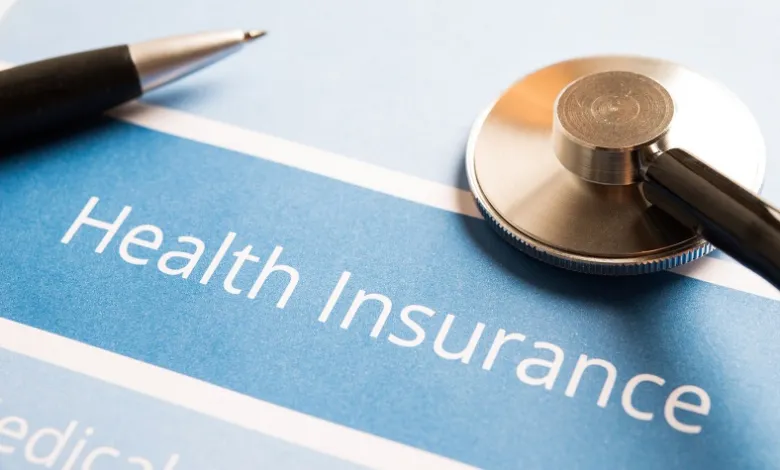

# **COLLABORATORS**
    

1. Cynthia Dalmas
2. Brian Ochieng
3. Nicole Bosibori
4. Nyakio Ruth
5. Edwin Mutendwa             

# **TABLE OF CONTENT**

1.Introduction

2.Business Understanding

3.Data Understanding

4.Problem Statement

5.Objectives

6.Metric of success

7.Preparation and Cleaning the data

8.Exploratory Data Analysis

9.Statistical Analysis

10.Data PreProcessing

11.Modelling

12.Evaluation

13.Conclusion

14.Recomendations

15.Next Steps

## **INTRODUCTION**

In 2023, the government of Kenya enacted the Social Health Insurance Act of 2023, marking a significant step towards Universal Health Coverage. This legislation ensures that all citizens can access quality healthcare services without facing catastrophic health expenses.

An accurate income prediction model can significantly improve the SHIF program. It can streamline contribution collection by determining appropriate amounts for informal workers, ensuring fairness and accuracy. The model can also identify low-income households within the informal sector, enabling targeted social programs that support the most vulnerable. Furthermore, data insights from the model can inform policy decisions that directly impact informal workers and the overall SHIF program, making the system more responsive and efficient.
.



## **STAKEHOLDERS**

1. Informal Sector Workers: Beneficiaries who will receive fair and accurate contribution assessments and targeted social programs.
2. Government of Kenya: Implementers of the SHIF program who will benefit from streamlined contribution collection and informed policy decisions.

## **BUSINESS UNDERSTANDING**

A critical challenge in implementing this Act lies in determining appropriate contributions from informal sector workers, who make up a substantial portion of the Kenyan workforce. Unlike formal employment with documented salaries, income in the informal sector is often variable and undocumented, complicating the process of contribution assessment. About 80% of Kenya’s population is engaged in the informal sector, and it is difficult to determine the monthly income, and by extension the SHI contributions, for this sector

## **DATA UNDERSTANDING**


The project aims to use publicly available data from the Kenya National Bureau of Statistics (KNBS), specifically the Kenya - Kenya Demographic and Health Survey 2022. KNBS collects data on household indicators from various regions in Kenya. Some of the variables include:**

Data Link: https://statistics.knbs.or.ke/nada/index.php/catalog/125#metadata-data_collection

    • House Structure: Type and quality of housing.
    
    • Sources of Water: Accessibility and types of water sources.
    
    • Incomes: Documented and estimated income levels.
    
    • Urban or Rural: Classification of the area as urban or rural.


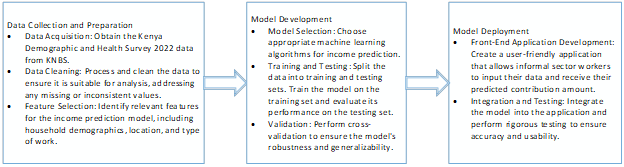



## **PROBLEM STATEMENT**

Determining appropriate contributions for informal sector workers is challenging due to the variable and undocumented nature of their income. This project aims to develop a machine learning model to predict the income of informal sector workers, ensuring accurate and fair contributions to the Social Health Insurance Fund (SHIF).

## **JUSTIFICATION OF THE PROBLEM**

The informal sector is a significant contributor to the Kenyan economy, yet informal workers often face challenges accessing social security benefits due to the undocumented and variable nature of their income. This presents a critical barrier to achieving Universal Health Coverage (UHC) through the Social Health Insurance Fund (SHIF).
Here's why predicting income for informal workers is a crucial problem to address:
- Fair and Equitable Contributions: An accurate income prediction model ensures fair contribution assessments for informal workers to the SHIF. Without such a model, some workers might be under- or over-charged, hindering the program's financial sustainability and fairness.
- Improved Program Efficiency: Streamlining contribution collection through a reliable model reduces administrative burdens, allowing the SHIF to focus on core functions like healthcare provision.
- Targeted Social Programs: Identifying low-income households within the informal sector enables the development of targeted social programs that directly address their needs. This improves the overall impact of social safety nets.
- Data-Driven Policy Decisions: Insights from the model can inform policy changes that better support informal workers and optimize the SHIF program. This promotes a more responsive and effective social security system.


## **OBJECTIVES**

**Main Objective**

1.	Develop a model to predict the contribution of the informal sector workers to the Social Health Insurance Fund based on data from household demographics, location, income group and type of work.

**Specific Objective**

1. Conduct Exploratory Data Analysis (EDA): Analyze the dataset to understand the distribution and relationships of various features and identify patterns associated with Income per month.
2.	Create an easy-to-use Chatbot that allows informal sector workers to determine their required contributions to the SHIF based on the prediction model.
3.	Utilize insights from the model to inform and support policy decisions, ensuring that SHIF contributions are fair and equitable for all informal sector workers.


## **METRICS OF SUCCESS**


1. 	Accuracy & F1 Score metrics will be used to evaluate the balance between precision and recall in classifying low-income    households within the informal sector, ensuring targeted social programs are accurately directed.
2. ROC curves will be used to identify the best classification model
3. User Satisfaction Score: This metric will gauge the ease of use of the Chatbot to determine their SHIF contribution
4. Policy Impact Assessment: This metric will evaluate how effectively our model's insights support policy decisions.


## **DATA PREPARATION**

Involves loading the dataset and checking to get information on the dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kruskal

In [2]:
#read csv files
data=pd.read_csv('Dataset 2.csv')
data.head()

,case identification,respondent's year of birth,respondent's current age,age in 5-year groups,region,type of place of residence,highest educational level,highest year of education,source of drinking water,time to get to water source,...,currently working,occupation,occupation (grouped),use mobile telephone for financial transactions,how much paid in last month,justifies domestic violence: refuses to cook,respondent education,partner education,respondent education.1,how much paid in last month.1
0,1 4 2,1987,34,30-34,mombasa,urban,no education,NaN,public tap/standpipe,15,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,informal education (madrasa/adult basic),35000
1,1 20 2,1992,30,30-34,mombasa,urban,primary,8,piped to yard/plot,on premises,...,yes,motor vehicle drivers,skilled manual,yes,10000,no,primary,primary,"secondary/""a"" level",20000
2,1 78 2,1993,28,25-29,mombasa,urban,higher,4,public tap/standpipe,20,...,yes,construction and maintenance labour/ers,unskilled manual,yes,NaN,no,university,"secondary/""a"" level",primary,100000
3,2 15 2,1995,27,25-29,mombasa,urban,no education,NaN,piped to neighbor,on premises,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,primary,12000
4,2 68 2,1994,28,25-29,mombasa,urban,higher,2,cart with small tank,on premises,...,yes,mechanical engineers,professional/technical/managerial,yes,NaN,no,middle level college (certificate/diploma),middle level college (certificate/diploma),middle level college (certificate/diploma),30000


In [3]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 82 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   case identification                                               5285 non-null   object
 1   respondent's year of birth                                        5285 non-null   int64 
 2   respondent's current age                                          5285 non-null   int64 
 3   age in 5-year groups                                              5285 non-null   object
 4   region                                                            5285 non-null   object
 5   type of place of residence                                        5285 non-null   object
 6   highest educational level                                         5285 non-null   object
 7   highest year of education                 

**The DataFrame contains 5285 entries and 82 columns and data types are integers and objects**

**The datatypes have 10 integers and 72 objects**

## **DATA CLEANING**

Data cleaning ensures the insights we get from the data is accurate.


In [4]:
#Make a copy of data
df= pd.read_csv('Dataset 2.csv')

**1.Dropping duplicated and irrelevant columns**

In [5]:
# Drop  columns
df = df.drop(columns=[
    'highest educational level', 'highest year of education', 'time to get to water source',
    'household has: refrigerator', 'religion','husband/partner\'s education level','ethnicity',
    'education in single years', 'household has: telephone (land-line)','educational level',
    'highest year of education (at level in mv106)', 'religion.1','partner education',
    'relationship to household head.1', 'sex of household head.1', 'age of household head.1',
    'literacy.1', 'owns a mobile telephone.1', 'last 12 months use mobile telephone for financial transactions.1',
    'is respondent\'s mobile phone a smart phone.1', 'has an account in a bank or other financial institution.1',
    'use of internet.1', 'frequency of using internet last month.1', 'self reported health status.1',
    'wealth index combined.1', 'husband/partner\'s total number of years of education',
    'justifies domestic violence: refuses to cook', 'respondent education.1','how much paid in last month',
    'occupation','respondent\'s occupation','case identification','wealth index for urban/rural','husband/partner\'s occupation'
])

# Check the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 48 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   respondent's year of birth                                      5285 non-null   int64 
 1   respondent's current age                                        5285 non-null   int64 
 2   age in 5-year groups                                            5285 non-null   object
 3   region                                                          5285 non-null   object
 4   type of place of residence                                      5285 non-null   object
 5   source of drinking water                                        5285 non-null   object
 6   type of toilet facility                                         5285 non-null   object
 7   household has: electricity                                  

**The columns were dropped due to redandancy,duplication with other columns and others had no impact on the main objective**

**2.Checking for duplicate rows**

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**There are no duplicate rows.**

**3.Checking and handling unique values in how much paid in last month**

In [7]:
# Display the count of each unique value in the column 'How Much Paid in Last Month.1'
print(df['how much paid in last month.1'].value_counts())

10000     454
15000     400
20000     324
5000      310
30000     285
         ... 
480         1
600000      1
8100        1
115000      1
10600       1
Name: how much paid in last month.1, Length: 199, dtype: int64


In [8]:
# Replace 'don't know' with NaN and 'did not work in last month' with 0
df['how much paid in last month.1'] = df['how much paid in last month.1'].replace({'don\'t know': np.nan, 'did not work in last month': 0})


**The values did not work in last month and don't know values in the column will be replaced to NaN to improve on the analysis.The Null values(NaN) will be handled in missing values**

**Covert column how much paid in last month to integer for better EDA**

In [9]:
# Convert to numeric, setting failed conversions to NaN
df['how much paid in last month.1'] = pd.to_numeric(df['how much paid in last month.1'], errors='coerce')

**4.Checking and handling the unique values in husband/partner\'s occupation**

In [10]:
# Display the unique values and their counts for 'husband/partner's occupation (grouped)'
print(df['husband/partner\'s occupation (grouped)'].value_counts())

skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
.a                                     11
Name: husband/partner's occupation (grouped), dtype: int64


In [11]:
# Replace ".a" with "Unknown" in "husband/partner's occupation (grouped)"
df['husband/partner\'s occupation (grouped)'] = df['husband/partner\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify
print(df['husband/partner\'s occupation (grouped)'].value_counts())


skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
Unknown                                11
Name: husband/partner's occupation (grouped), dtype: int64


**Replace rows where 'husband/partner's occupation (grouped)' is '.a' to improve on the data analysis**

**5.Checking and handling the unique values 'type of cooking fuel'**

In [12]:
# Display the unique values and their counts for 'type of cooking fuel'
print(df['type of cooking fuel'].value_counts())

wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
alcohol/ethanol               4
17                            4
agricultural crop             1
solar power                   1
15                            1
Name: type of cooking fuel, dtype: int64


In [13]:
# Replace '17' and '15' with 'unknown' in the 'type of cooking fuel' column
df['type of cooking fuel'] = df['type of cooking fuel'].replace(['17', '15'], 'unknown')

# Verify
print(df['type of cooking fuel'].value_counts())


wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
unknown                       5
alcohol/ethanol               4
agricultural crop             1
solar power                   1
Name: type of cooking fuel, dtype: int64


**Replace the rows where 'type of cooking fuel' is '17' or '15' with unknown for better data analysis**

**6.Checking and handling unique values and their counts for 'occupation (grouped)'**

In [14]:
# Display the unique values and their counts for 'occupation (grouped)'
occupation_grouped_counts = df['occupation (grouped)'].value_counts()

# Print the counts
print(occupation_grouped_counts)

agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
.a                                     19
Name: occupation (grouped), dtype: int64


In [15]:
# Replace ".a" with "Unknown" in "occupation (grouped)"
df['occupation (grouped)'] = df['occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['occupation (grouped)'].value_counts())

agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
Unknown                                19
Name: occupation (grouped), dtype: int64


**Replace rows where 'occupation (grouped)' is '.a' with unknown give insight to the data**

**7.Checking and handling unique values and their counts for respondent's occupation (grouped)**

In [16]:
# Display the unique values and their counts for 'occupation (grouped)'
respondent_occupation_grouped_counts = df['respondent\'s occupation (grouped)'].value_counts()

# Print the counts
print(respondent_occupation_grouped_counts)

not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
.a                                      6
Name: respondent's occupation (grouped), dtype: int64


In [17]:
# Replace ".a" with "Unknown" in "respondent's occupation (grouped)"
df['respondent\'s occupation (grouped)'] = df['respondent\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['respondent\'s occupation (grouped)'].value_counts())

not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
Unknown                                 6
Name: respondent's occupation (grouped), dtype: int64


**Replace rows where 'respondent's occupation (grouped)' is '.a' with unknown give insight to the data**

**8.Checking for missing values**

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

is respondent's mobile phone a smart phone    957
how much paid in last month.1                 675
dtype: int64

**Handling the missing values**

In [19]:
# Fill missing values in 'is respondent's mobile phone a smart phone' with mode
df['is respondent\'s mobile phone a smart phone'] = df['is respondent\'s mobile phone a smart phone'].fillna(df['is respondent\'s mobile phone a smart phone'].mode()[0])

# Impute missing income values with the median
df['how much paid in last month.1'] = df['how much paid in last month.1'].fillna(df['how much paid in last month.1'].median())


In [20]:
# Confirm missing values
missing_values = df.isnull().sum()
missing_values

respondent's year of birth                                        0
respondent's current age                                          0
age in 5-year groups                                              0
region                                                            0
type of place of residence                                        0
source of drinking water                                          0
type of toilet facility                                           0
household has: electricity                                        0
household has: radio                                              0
household has: television                                         0
household has: bicycle                                            0
household has: motorcycle/scooter                                 0
household has: car/truck                                          0
main floor material                                               0
main wall material                              

**The missing values in is respondents mobile phone a smart phone  was filled with mode and and how much paid in last month.1 was filled with median reasons is the datatype of each**

**9.Checking for outliers**

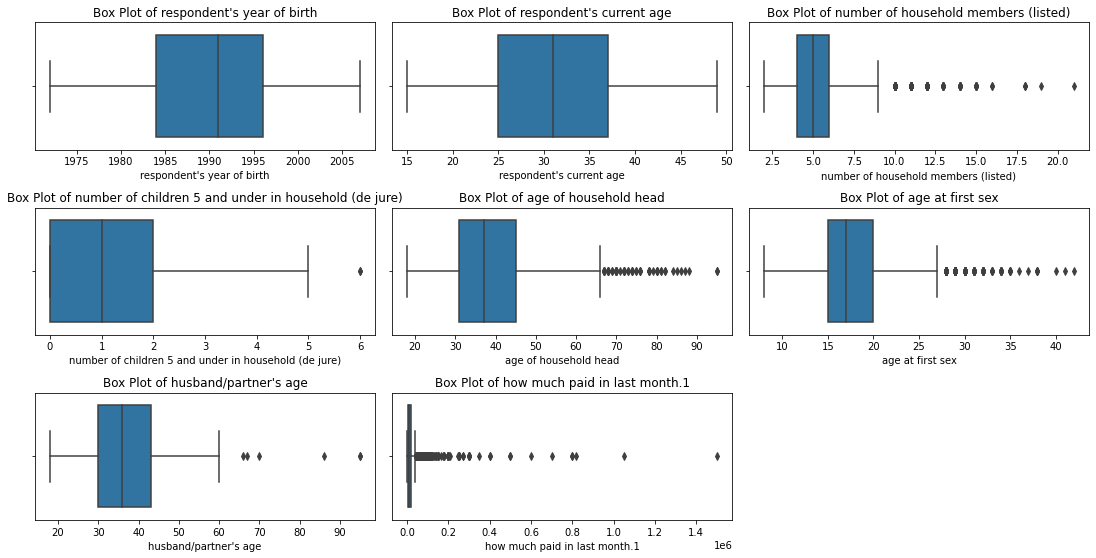

In [21]:
# Select numeric columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

**Handle the outliers  by capping them inorder to maintain all datapoints**

In [22]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df = cap_outliers(df, column)

# Check the shape of the dataframe after capping outliers
print(df.shape)


(5285, 48)


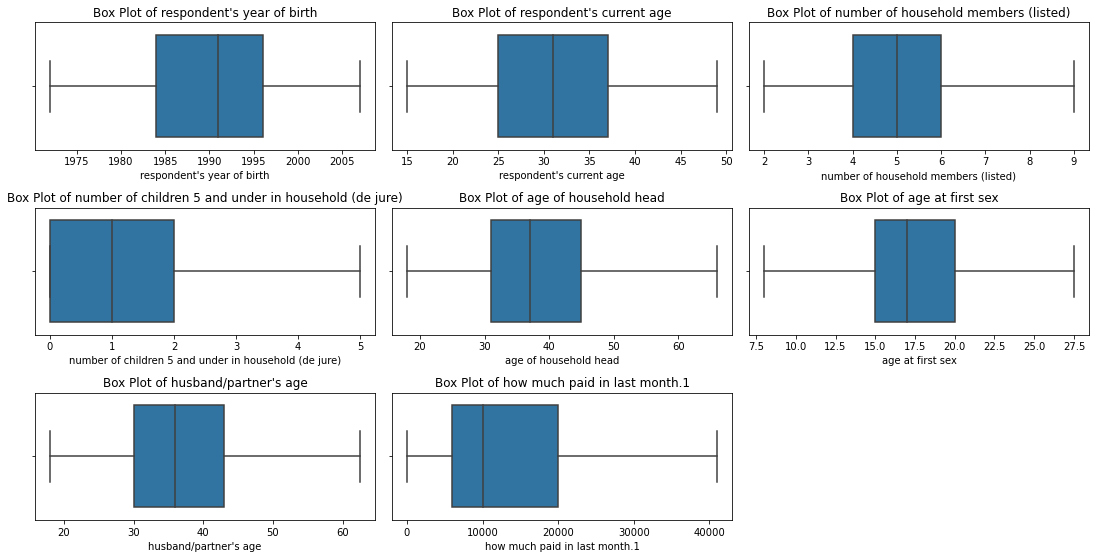

In [23]:
# Confirm the outliers were handled
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

#  **EXPLORATORY DATA ANALYSIS 📉**

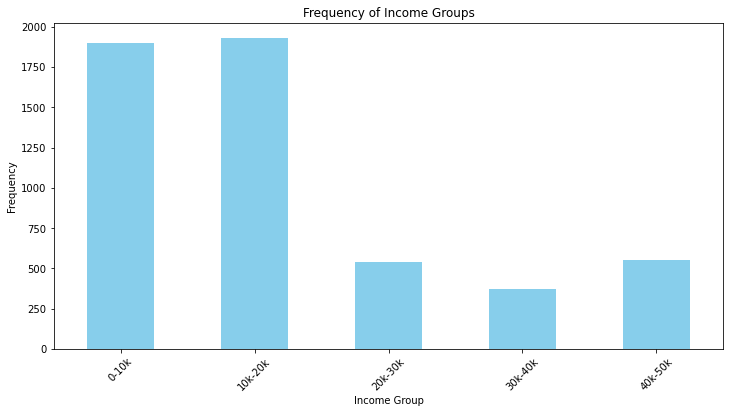

In [24]:
# Plot the distribution of how much paid in last month
# Define the income bins
bins = [0, 10000, 20000, 30000, 40000,float('inf')]
bin_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k']

# Bin the income data
df['income_group'] = pd.cut(df['how much paid in last month.1'], bins=bins, labels=bin_labels, right=False)

# Count the frequencies of each income group
income_group_counts = df['income_group'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Frequency of Income Groups')
plt.xticks(rotation=45)
plt.show()


**Highest earning salary is between 40k to 50k**

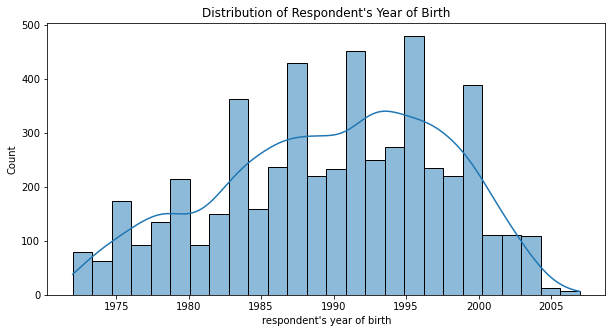

In [25]:
# Plot distribution of Respondent's Year of birth
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x= 'respondent\'s year of birth', kde=True)
plt.title('Distribution of Respondent\'s Year of Birth')
plt.show()

**Majority of the workers in the informal sector are born around 1995**

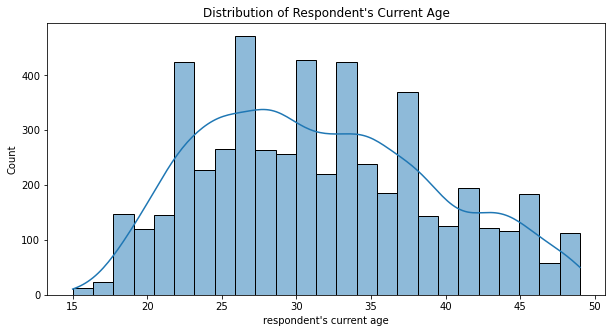

In [26]:
# Plot distribution of Respondent's Current Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='respondent\'s current age', kde=True)
plt.title('Distribution of Respondent\'s Current Age')
plt.show()

**Majority of the informal sector workers are around the age of 26**

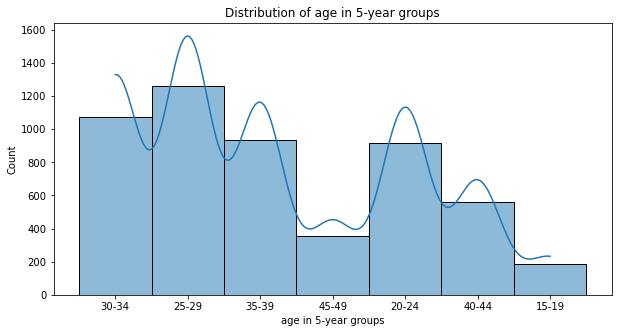

In [27]:
# Plot distribution of age in 5-year groups
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age in 5-year groups', kde=True)
plt.title('Distribution of age in 5-year groups')
plt.show()

**The largest age group in working in the informal sector is between the ages of 25 to 29 years**

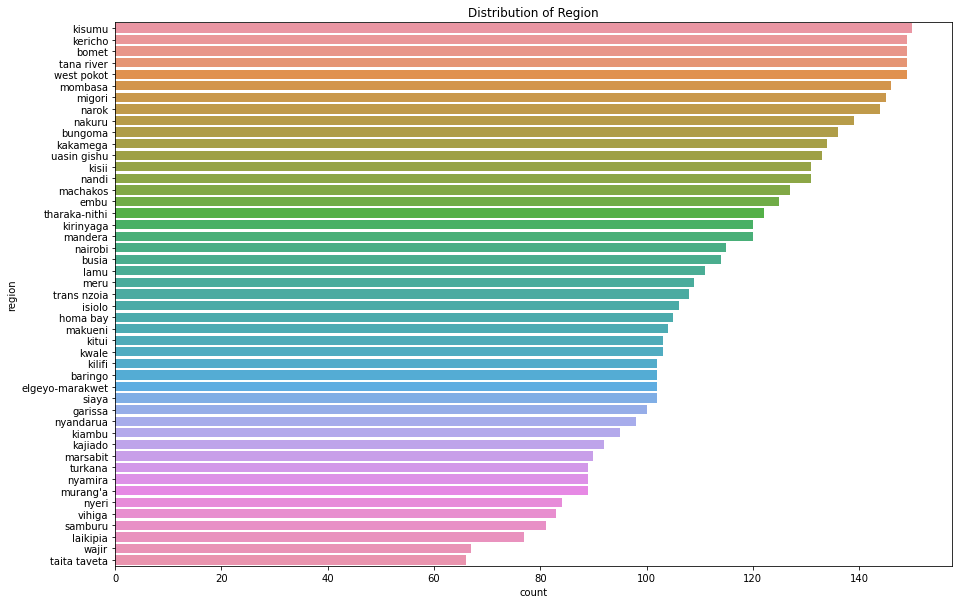

In [28]:
# Plot distribution of Region
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index)
plt.title('Distribution of Region')
plt.show()

**The region that with the highest number informal sector workers is Kisumu while the least is Taita Taveta**

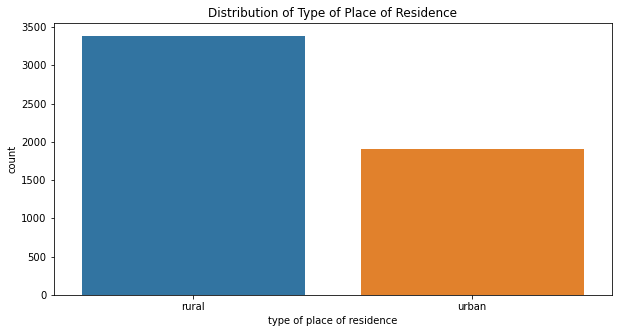

In [29]:
# Plot distribution of Type of Place of Residence
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type of place of residence', order=df['type of place of residence'].value_counts().index)
plt.title('Distribution of Type of Place of Residence')
plt.show()

**Majority of the informal sector workers live in rural areas**

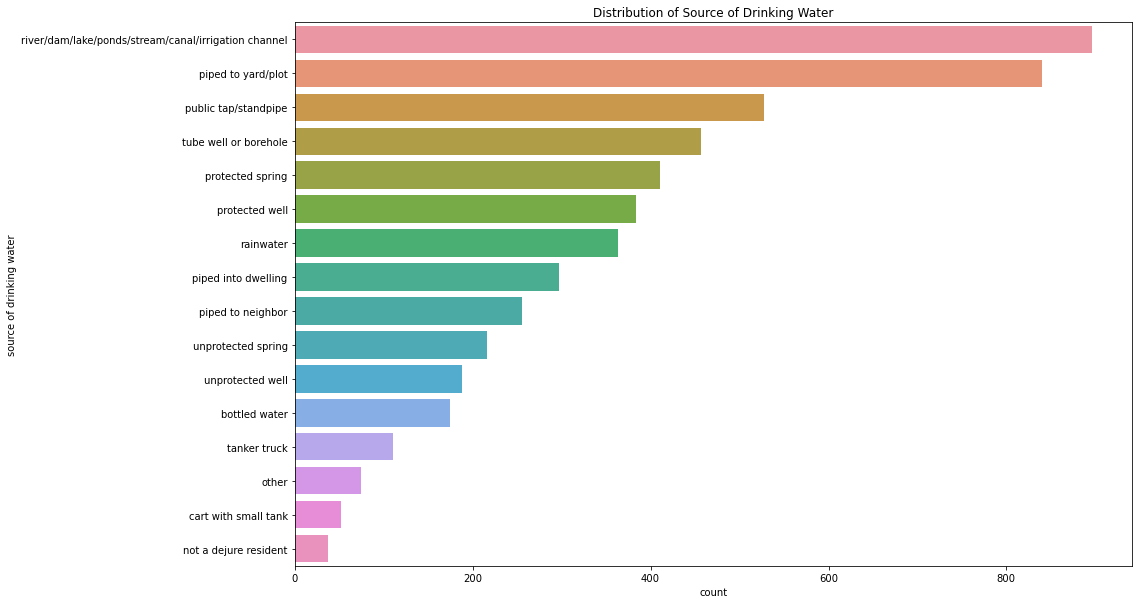

In [30]:
# Plot distribution of Source of Drinking Water
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='source of drinking water', order=df['source of drinking water'].value_counts().index)
plt.title('Distribution of Source of Drinking Water')
plt.show()

**Majority of the informal sector workers het their drinking water from the river/dam/lake/ponds/stream/Canal/irrigation chanel**

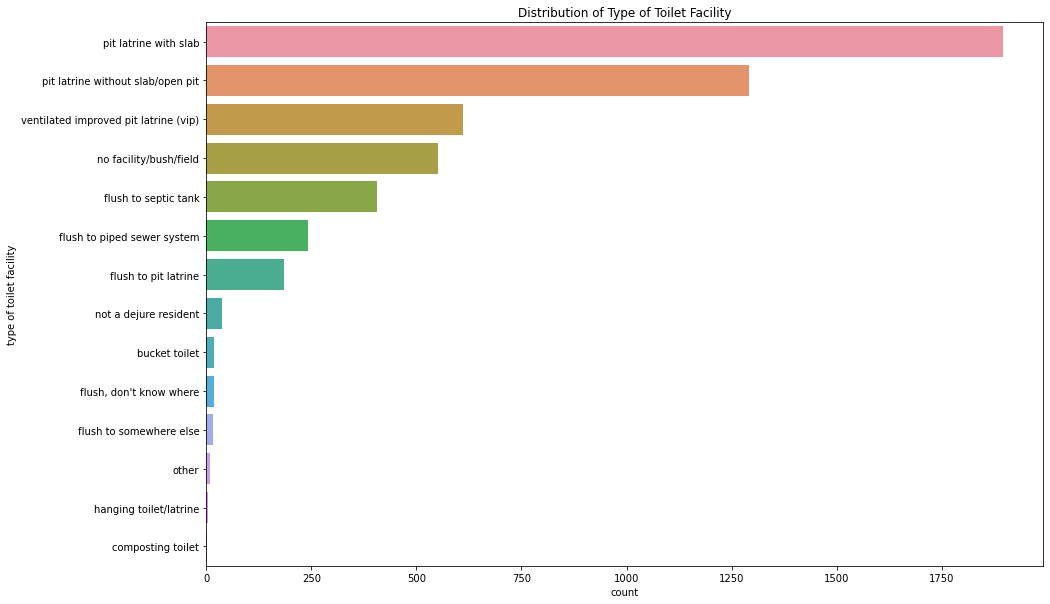

In [31]:
# Plot distribution of Type of Toilet Facility
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of toilet facility', order=df['type of toilet facility'].value_counts().index)
plt.title('Distribution of Type of Toilet Facility')
plt.show()

**Majority of informal sector workers use pit latrines with slabs**

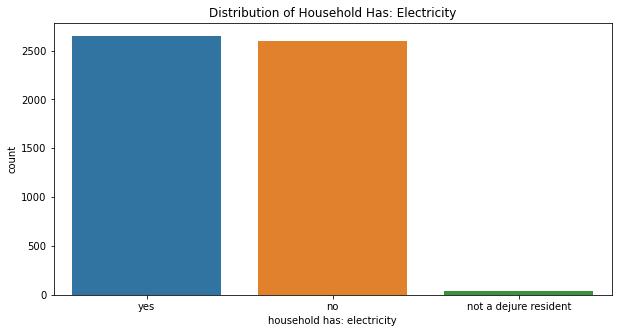

In [32]:
# Plot distribution of Household Has: Electricity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: electricity', order=df['household has: electricity'].value_counts().index)
plt.title('Distribution of Household Has: Electricity')
plt.show()

**The informal sector workers all have equal numbers of households who have electricity and those without**

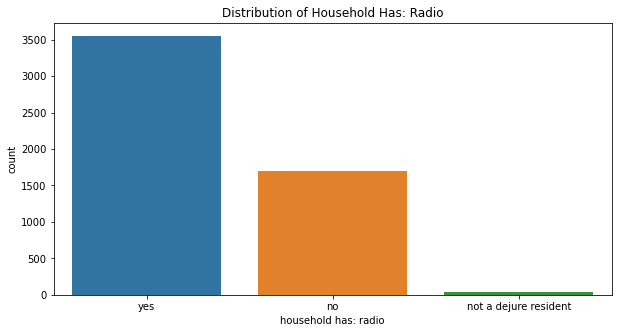

In [33]:
# Plot distribution of Household Has: Radio
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: radio', order=df['household has: radio'].value_counts().index)
plt.title('Distribution of Household Has: Radio')
plt.show()

**Majority of the informal sector workers households have radios**

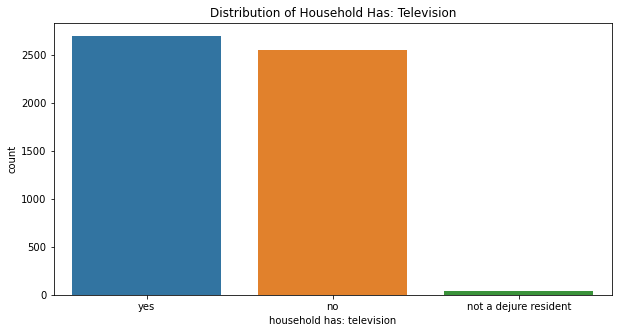

In [34]:
# Plot distribution of Household Has: television
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: television', order=df['household has: television'].value_counts().index)
plt.title('Distribution of Household Has: Television')
plt.show()

**Majority of the informal sector workers households have Televisions**

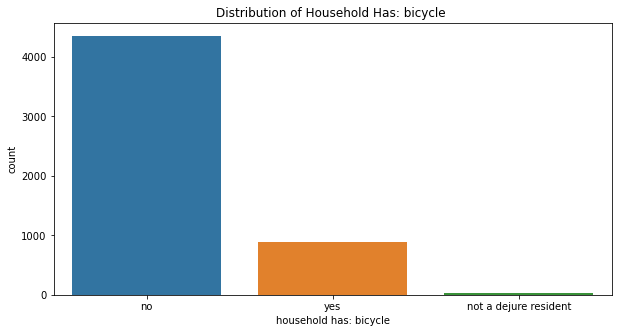

In [35]:
# Plot distribution of Household Has: bicycle
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: bicycle', order=df['household has: bicycle'].value_counts().index)
plt.title('Distribution of Household Has: bicycle ')
plt.show()

**Majority of the informal sector workers households have no bicycles**

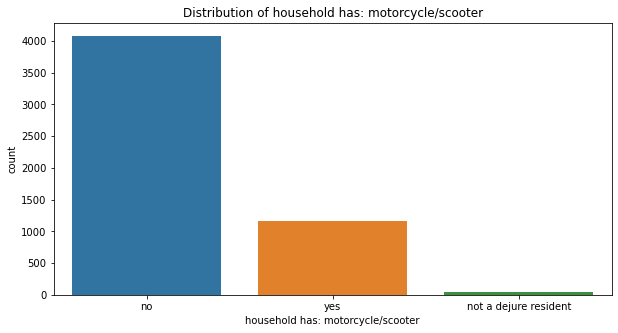

In [36]:
# Plot distribution of household has: motorcycle/scooter
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: motorcycle/scooter', order=df['household has: motorcycle/scooter'].value_counts().index)
plt.title('Distribution of household has: motorcycle/scooter')
plt.show()

**Majority of the informal sector workers households have no motorcycle/scooter**

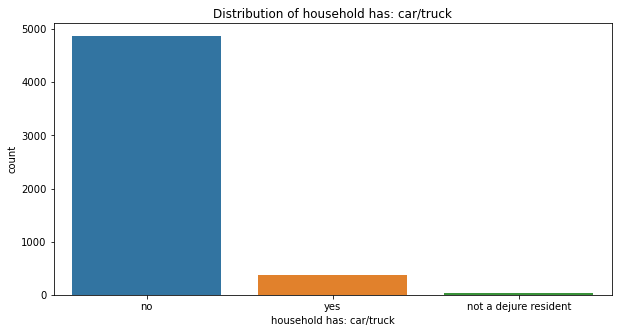

In [37]:
# Plot distribution of household has: car/truck
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: car/truck', order=df['household has: car/truck'].value_counts().index)
plt.title('Distribution of household has: car/truck')
plt.show()

**Majority of the informal sector workers households have no cars/trucks**

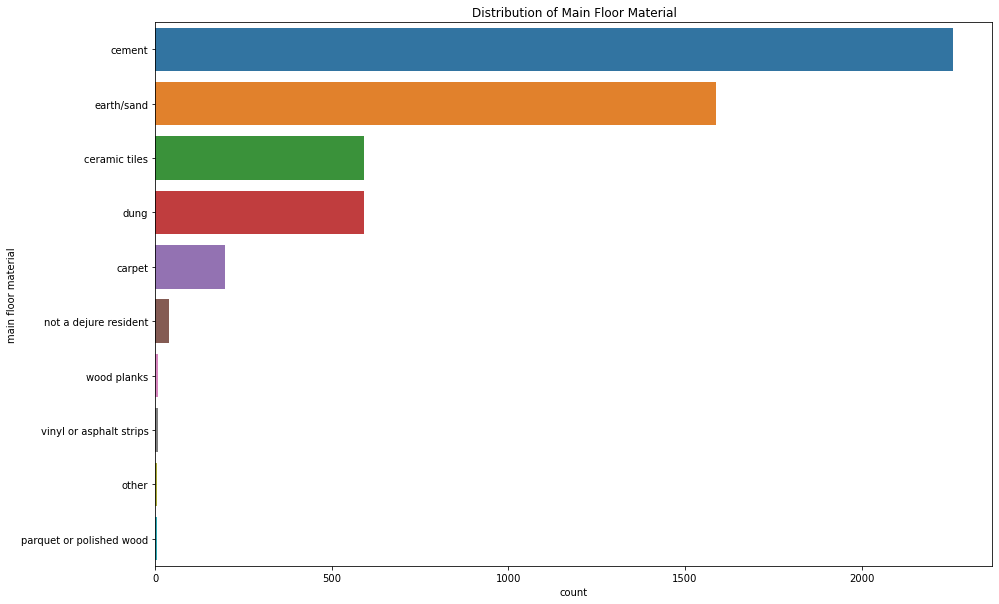

In [38]:
# Plot distribution of Main Floor Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main floor material', order=df['main floor material'].value_counts().index)
plt.title('Distribution of Main Floor Material')
plt.show()

**Majority of the informal sector workers live in houses with cement floors**

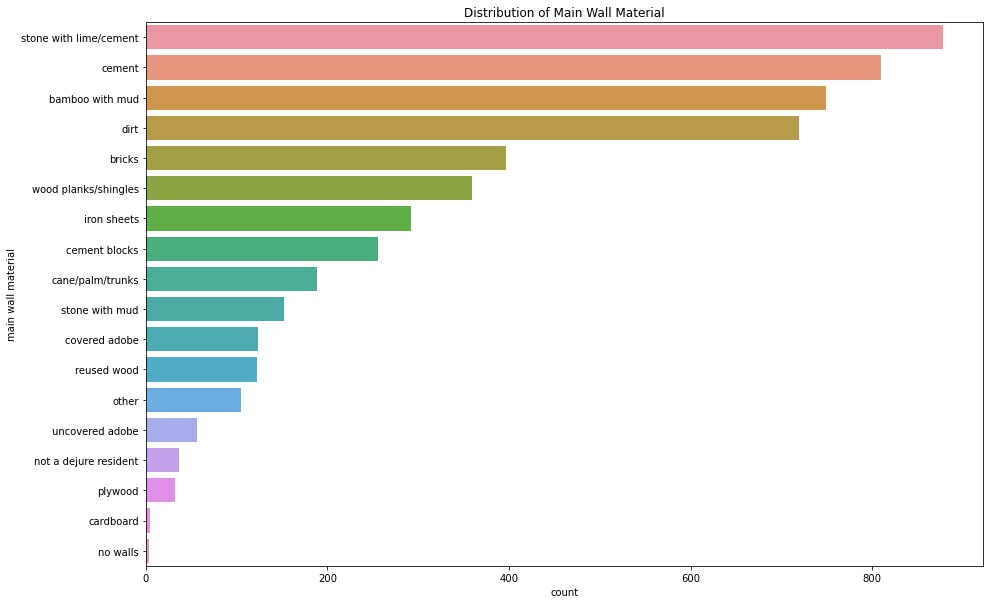

In [39]:
# Plot distribution of Main Wall Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main wall material', order=df['main wall material'].value_counts().index)
plt.title('Distribution of Main Wall Material')
plt.show()

**Majority of the informal sector workers live in houses with walls made of stone with lime/cement**

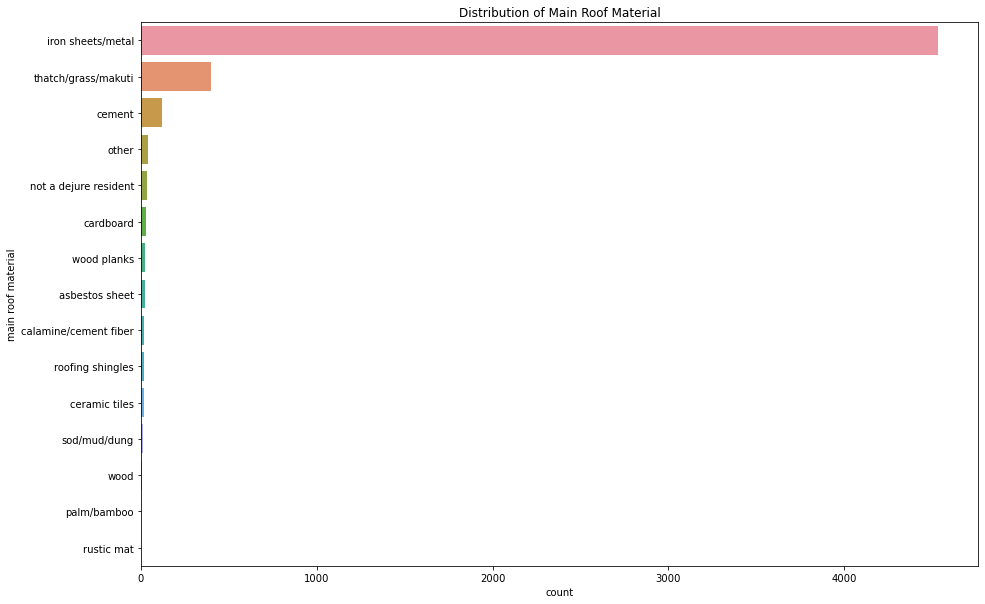

In [40]:
# Plot distribution of Main Roof Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main roof material', order=df['main roof material'].value_counts().index)
plt.title('Distribution of Main Roof Material')
plt.show()

**Majority of the informal sector workers live in houses with roofs made of iron sheets/metal**

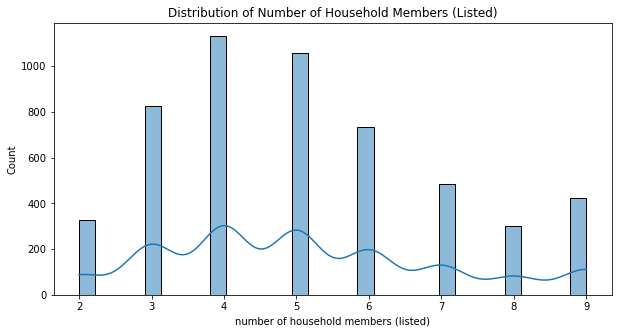

In [41]:
# Plot distribution of Number of Household Members (Listed)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of household members (listed)', kde=True)
plt.title('Distribution of Number of Household Members (Listed)')
plt.show()

**Majority of the households have 4 members**

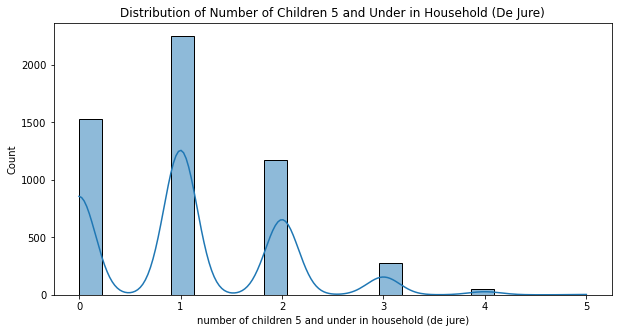

In [42]:
# Plot distribution of Number of Children 5 and Under in Household (De Jure)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of children 5 and under in household (de jure)', kde=True)
plt.title('Distribution of Number of Children 5 and Under in Household (De Jure)')
plt.show()

**Majority of the households have 1 child under the age of 5 years**

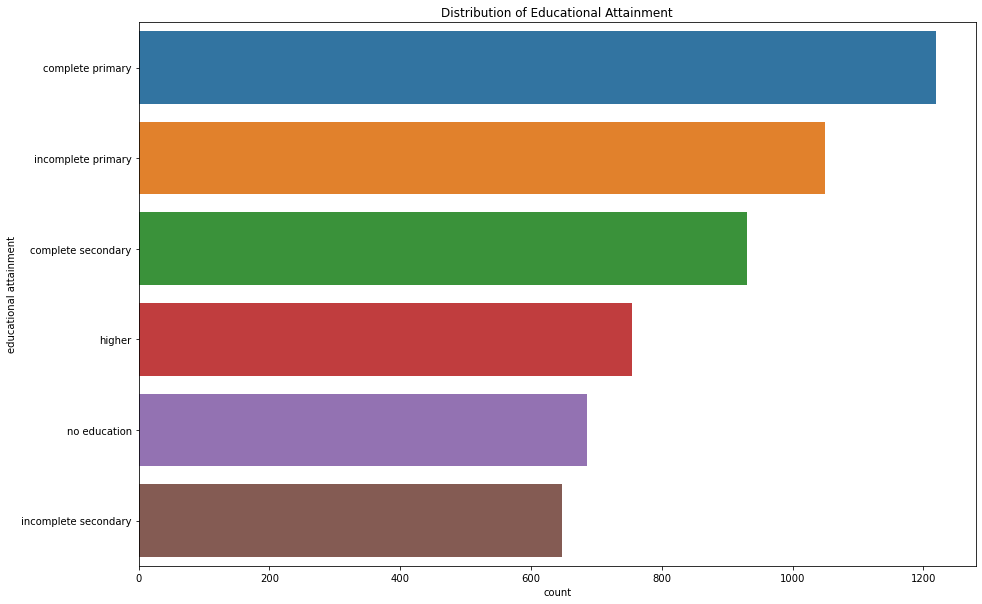

In [43]:
# Plot distribution of Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment', order=df['educational attainment'].value_counts().index)
plt.title('Distribution of Educational Attainment')
plt.show()

**Majortiy of the workers finished primary school but not highschool and the ones who finshed highschool school very few got higher education**

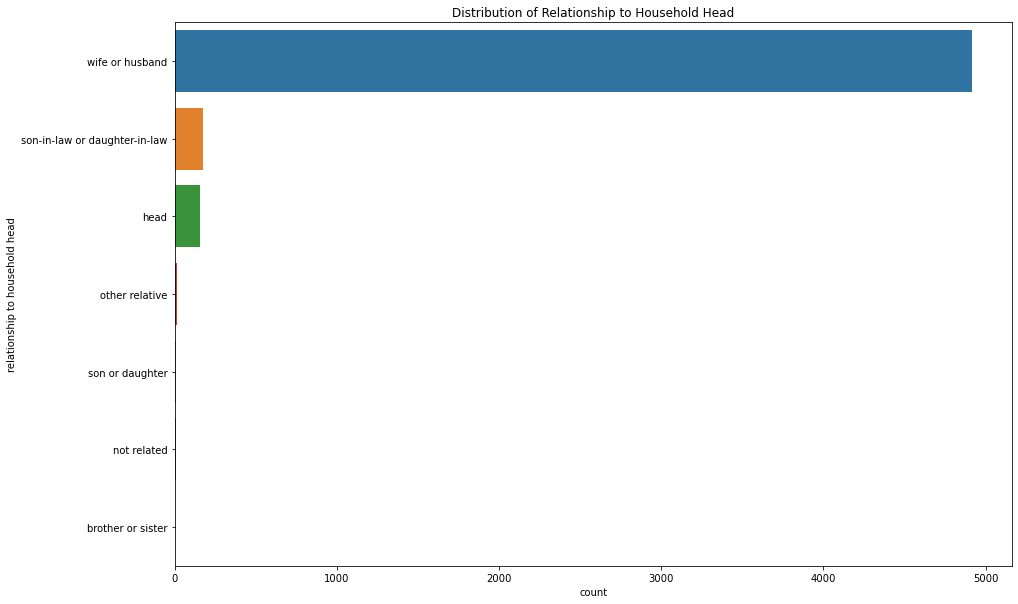

In [44]:
# Plot distribution of Relationship to Household Head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='relationship to household head', order=df['relationship to household head'].value_counts().index)
plt.title('Distribution of Relationship to Household Head')
plt.show()

**Majority of them workers live with either their husband or wife**

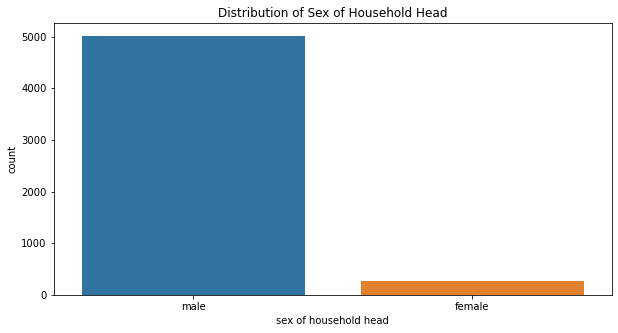

In [45]:
# Plot distribution of Sex of Household Head
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex of household head', order=df['sex of household head'].value_counts().index)
plt.title('Distribution of Sex of Household Head')
plt.show()

**Majority of the household heads are male**

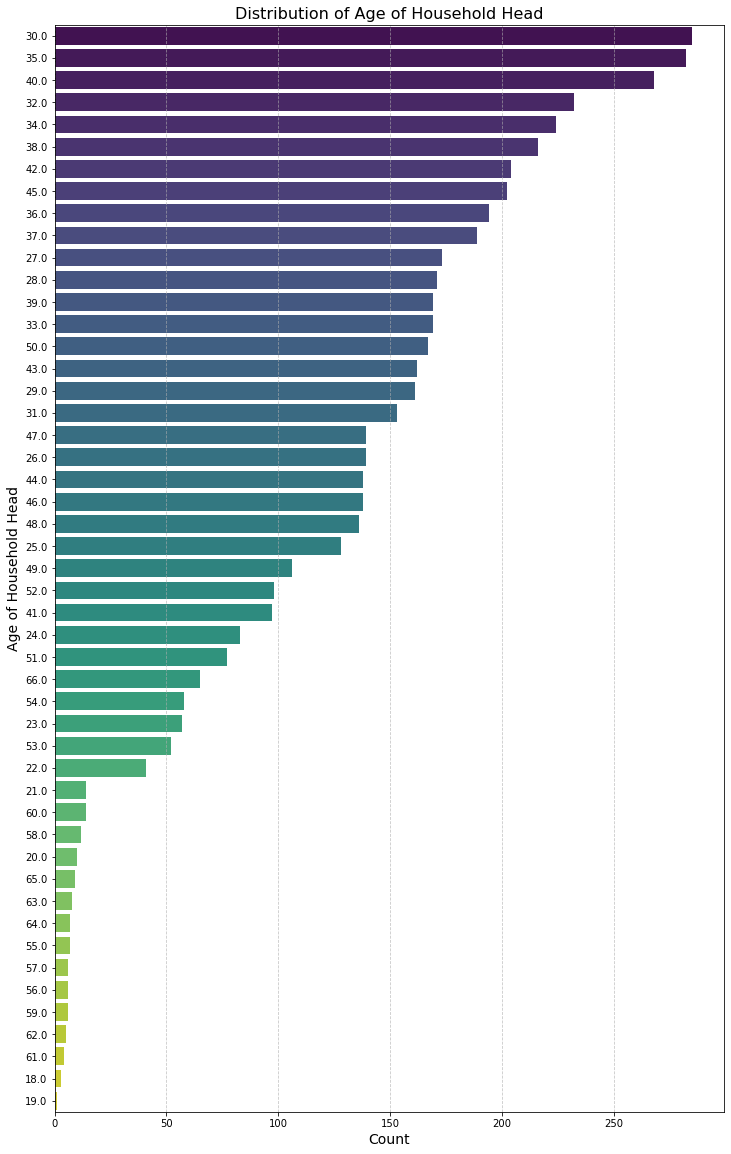

In [46]:
# Plot distribution of Age of Household Head
plt.figure(figsize=(12, 20))

# Countplot with enhanced aesthetics
sns.countplot(data=df, y='age of household head', order=df['age of household head'].value_counts().index, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Age of Household Head', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age of Household Head', fontsize=14)

# Adding gridlines for better visual reference
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**Majority of the household heads are 33 years old**

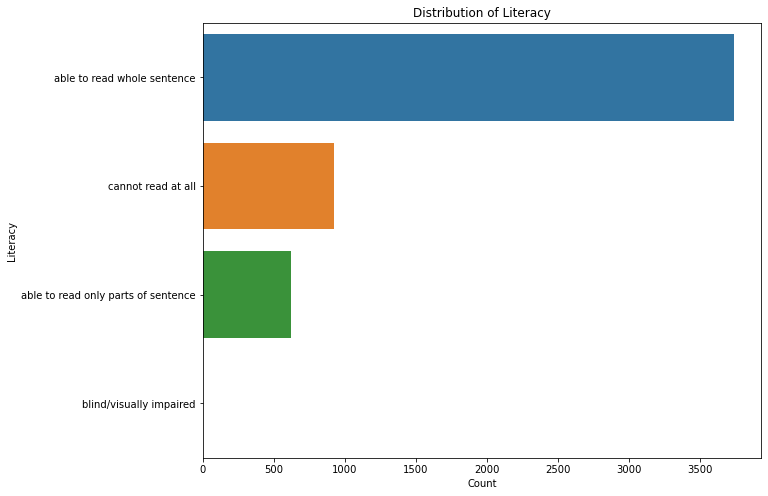

In [47]:
# Plot distribution of Literacy
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='literacy', order=df['literacy'].value_counts().index, orient='h')
plt.title('Distribution of Literacy')
plt.xlabel('Count')
plt.ylabel('Literacy')
plt.show()

**Majority of the workers can be literate as they are able to read whole sentence**

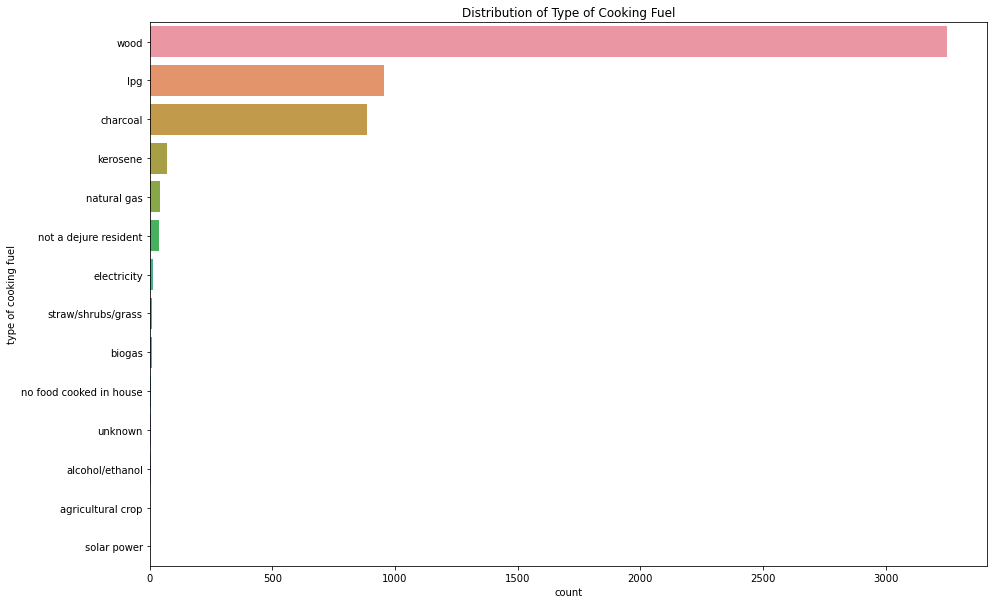

In [48]:
# Plot distribution of Type of Cooking Fuel
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of cooking fuel', order=df['type of cooking fuel'].value_counts().index)
plt.title('Distribution of Type of Cooking Fuel')
plt.show()

**Majority of the workers use Wood as cooking fuel**

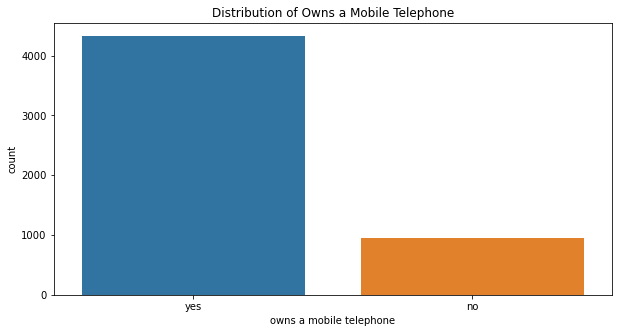

In [49]:
# Plot distribution of Owns a Mobile Telephone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='owns a mobile telephone', order=df['owns a mobile telephone'].value_counts().index)
plt.title('Distribution of Owns a Mobile Telephone')
plt.show()

**Majority of the workers have Mobile Telephones**

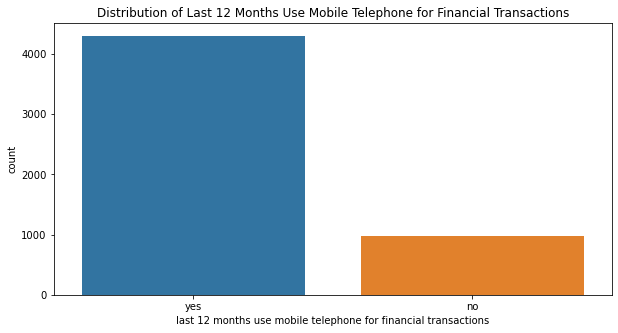

In [50]:
# Plot distribution of Last 12 Months Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='last 12 months use mobile telephone for financial transactions', order=df['last 12 months use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Last 12 Months Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers in the Last 12 Months Use Mobile Telephone for Financial Transactions**

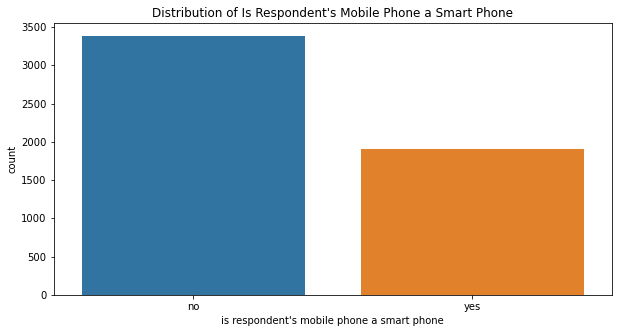

In [51]:
# Plot distribution of Is Respondent's Mobile Phone a Smart Phone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is respondent\'s mobile phone a smart phone', order=df['is respondent\'s mobile phone a smart phone'].value_counts().index)
plt.title('Distribution of Is Respondent\'s Mobile Phone a Smart Phone')
plt.show()

**Majority of the workers phones are not smart phones**

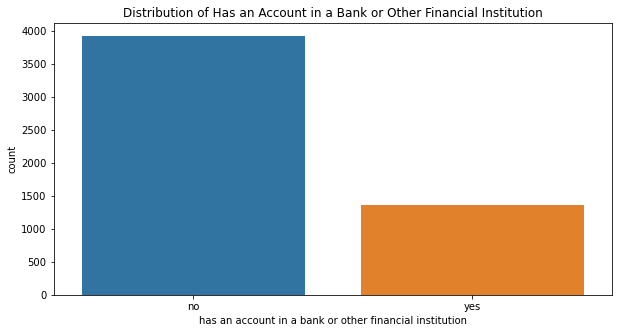

In [52]:
# Plot distribution of Has an Account in a Bank or Other Financial Institution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has an account in a bank or other financial institution', order=df['has an account in a bank or other financial institution'].value_counts().index)
plt.title('Distribution of Has an Account in a Bank or Other Financial Institution')
plt.show()

**Majority of the workers do not have an account in a bank or other financial institution**

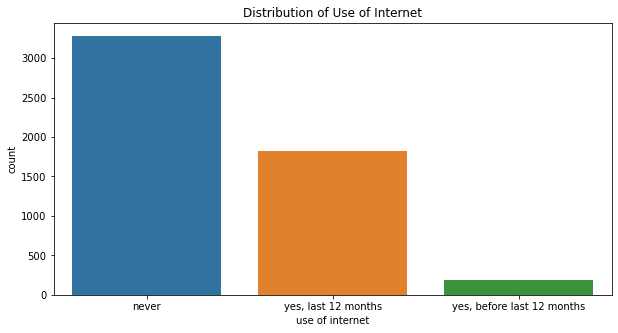

In [53]:
# Plot distribution of Use of Internet
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use of internet', order=df['use of internet'].value_counts().index)
plt.title('Distribution of Use of Internet')
plt.show()

**Majority of the workers have never used the internet**

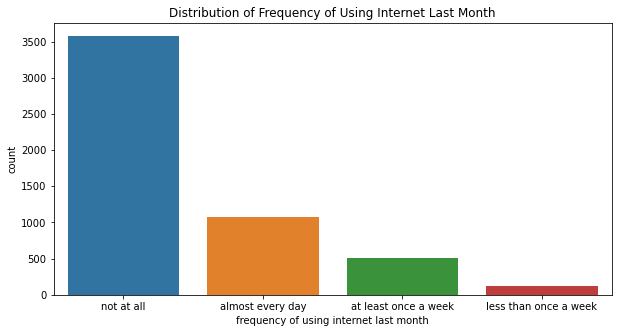

In [54]:
# Plot distribution of Frequency of Using Internet Last Month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='frequency of using internet last month', order=df['frequency of using internet last month'].value_counts().index)
plt.title('Distribution of Frequency of Using Internet Last Month')
plt.show()

**Majority of the workers did not use the interent at all in the last month**

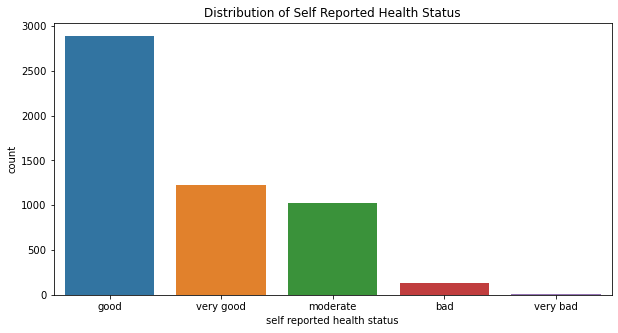

In [55]:
# Plot distribution of Self Reported Health Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='self reported health status', order=df['self reported health status'].value_counts().index)
plt.title('Distribution of Self Reported Health Status')
plt.show()

**Majority of the workers reported their health status as good**

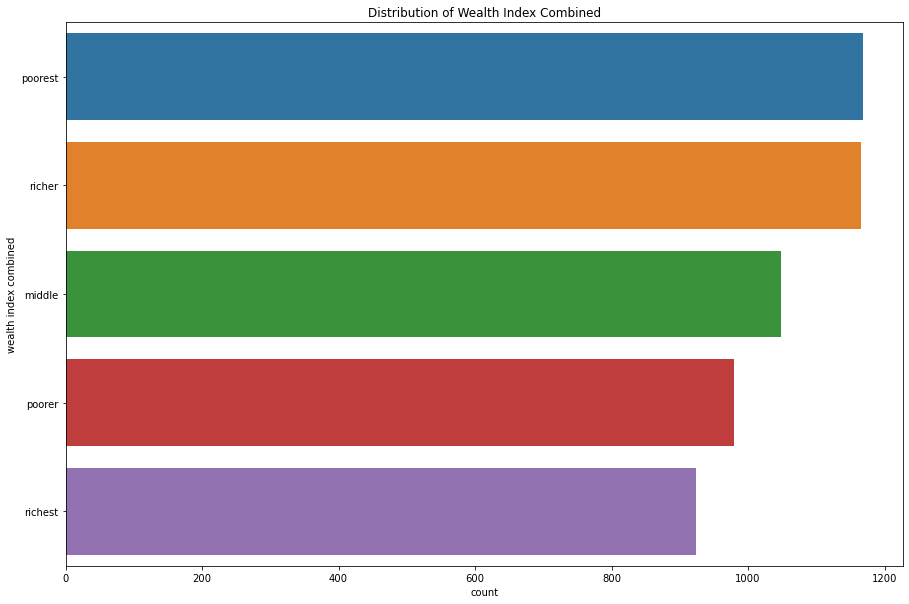

In [56]:
# Plot distribution of Wealth Index Combined
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='wealth index combined', order=df['wealth index combined'].value_counts().index)
plt.title('Distribution of Wealth Index Combined')
plt.show()

**Majority of the workers are extremely poor**

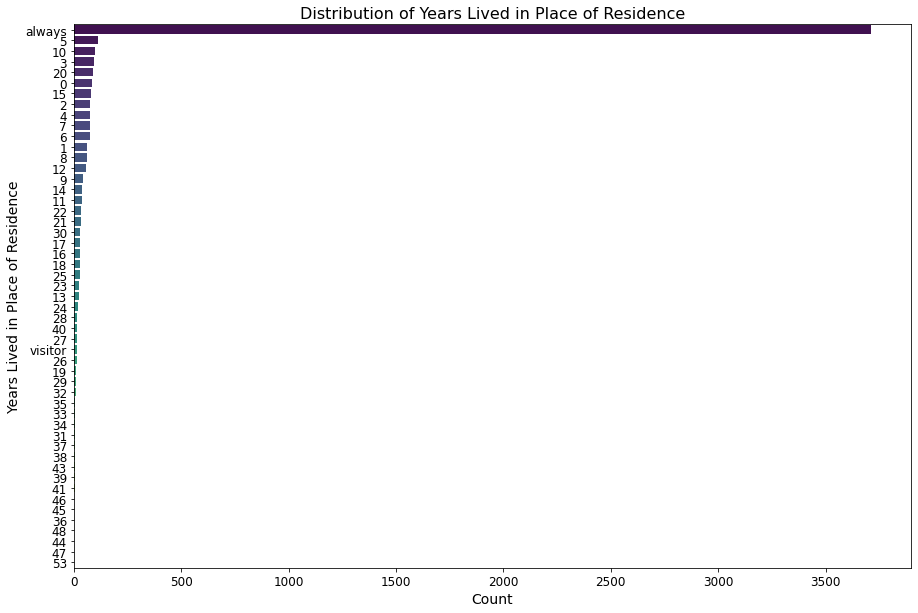

In [57]:
# Plot distribution of Years Lived in Place of Residence
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='years lived in place of residence', order=df['years lived in place of residence'].value_counts().index, palette='viridis')

plt.title('Distribution of Years Lived in Place of Residence', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Years Lived in Place of Residence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Majority of the workers have always lived in the same place**

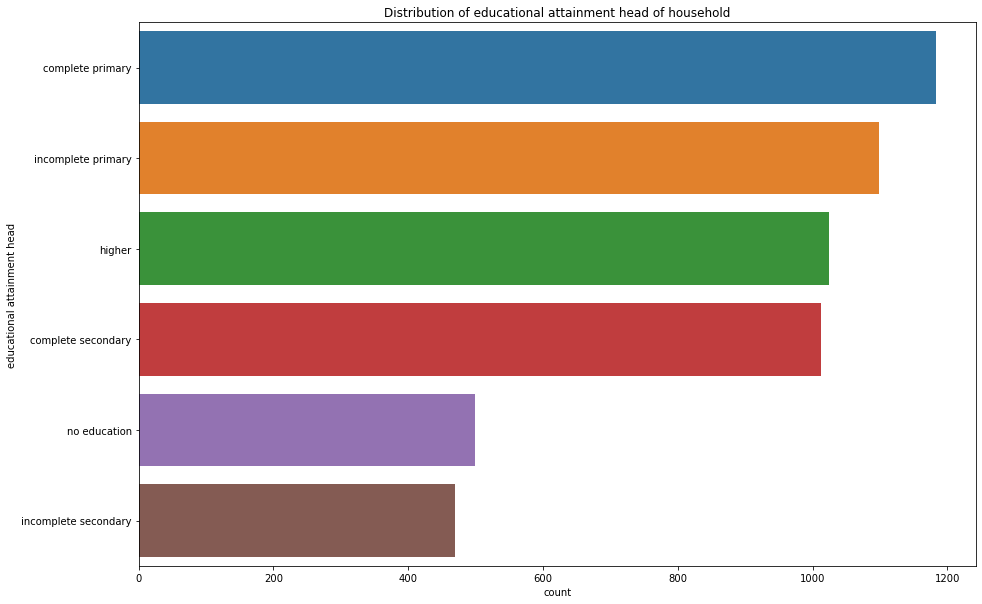

In [58]:
# Plot distribution of Educational attainment head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment head', order=df['educational attainment head'].value_counts().index)
plt.title('Distribution of educational attainment head of household')
plt.show()

**Majority of the household heads completed primary and very few completed high school.For those who completed highschool almost all got higher education**

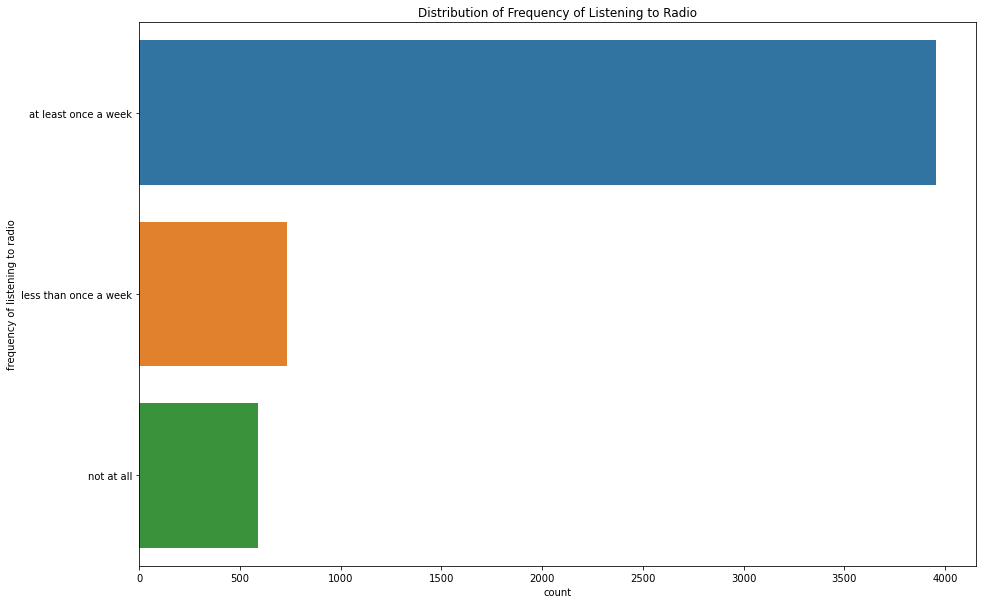

In [59]:
# Plot distribution of Frequency of Listening to Radio
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of listening to radio', order=df['frequency of listening to radio'].value_counts().index)
plt.title('Distribution of Frequency of Listening to Radio')
plt.show()

**Majority of the workers listen to the radio atleast once a week**

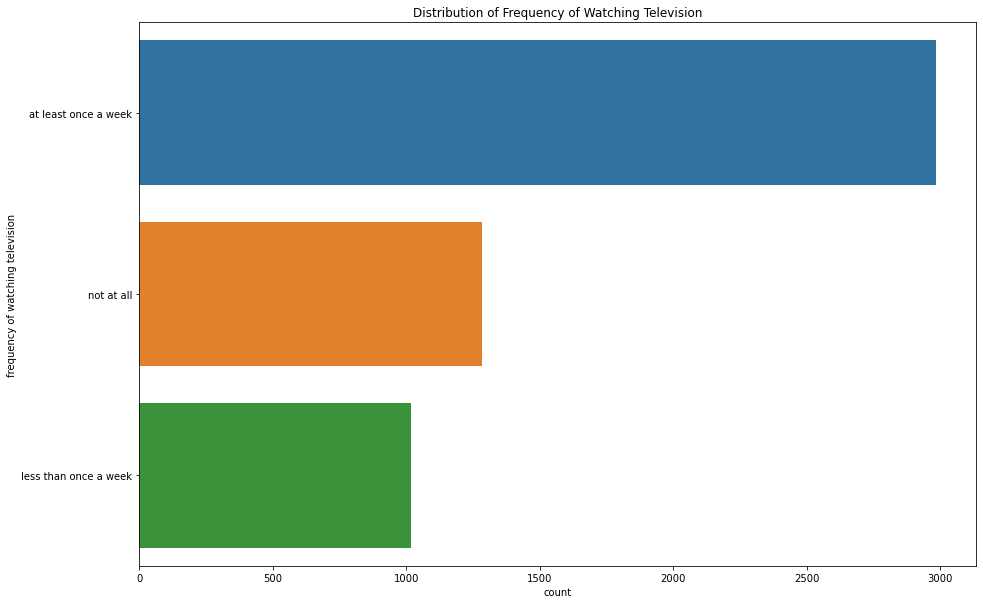

In [60]:
# Plot distribution of Frequency of Watching Television
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of watching television', order=df['frequency of watching television'].value_counts().index)
plt.title('Distribution of Frequency of Watching Television')
plt.show()

**Majority of the workers watch television atleast once a week**

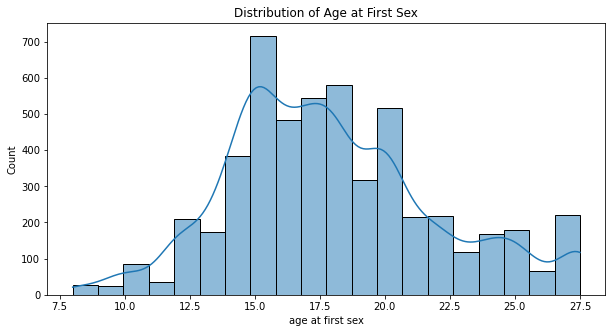

In [61]:
# Plot distribution of Age at First Sex
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age at first sex', bins=20, kde=True)
plt.title('Distribution of Age at First Sex')
plt.show()

**Majority of the workers first had sex at the age of 16 and 17**

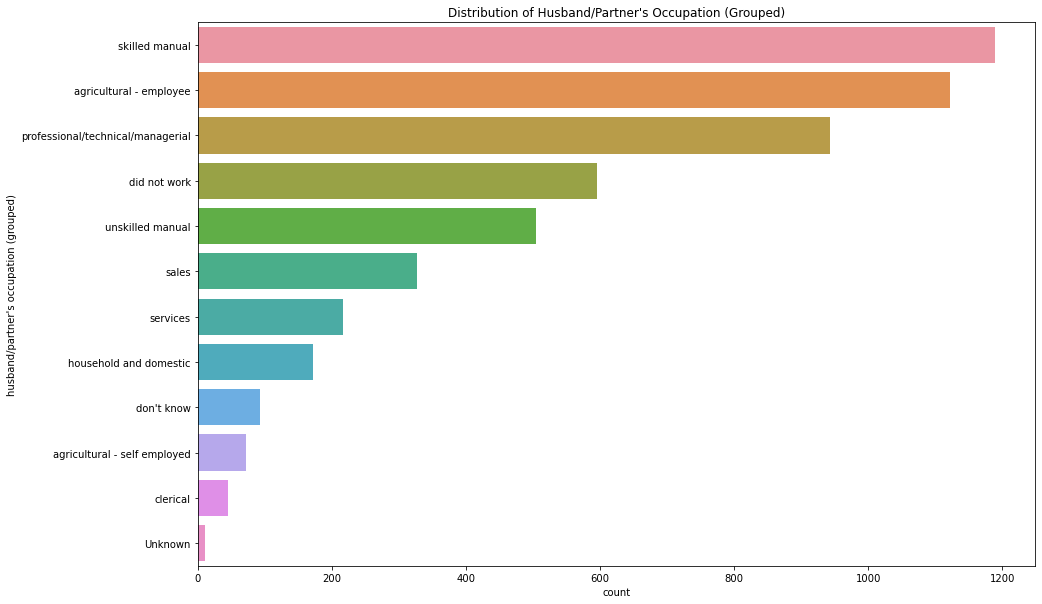

In [62]:
# Plot distribution of Husband/Partner's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s occupation (grouped)', order=df['husband/partner\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Occupation (Grouped)')
plt.show()

**Majority of the wrokers Husband/Partner's are skilled manually**

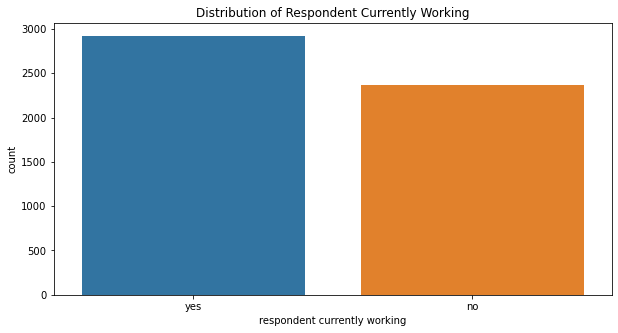

In [63]:
# Plot distribution of Respondent Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent currently working', order=df['respondent currently working'].value_counts().index)
plt.title('Distribution of Respondent Currently Working')
plt.show()

**Majority of the Respondent are Currently Working**

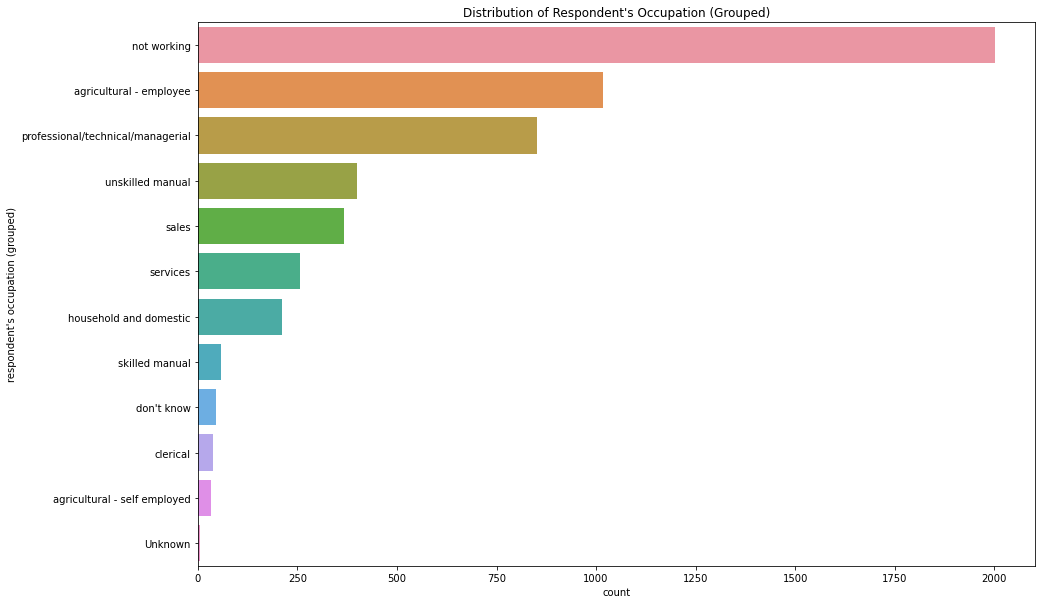

In [64]:
# Plot distribution of Respondent's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent\'s occupation (grouped)', order=df['respondent\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Respondent\'s Occupation (Grouped)')
plt.show()

**Majority of the Respondent's are not working**

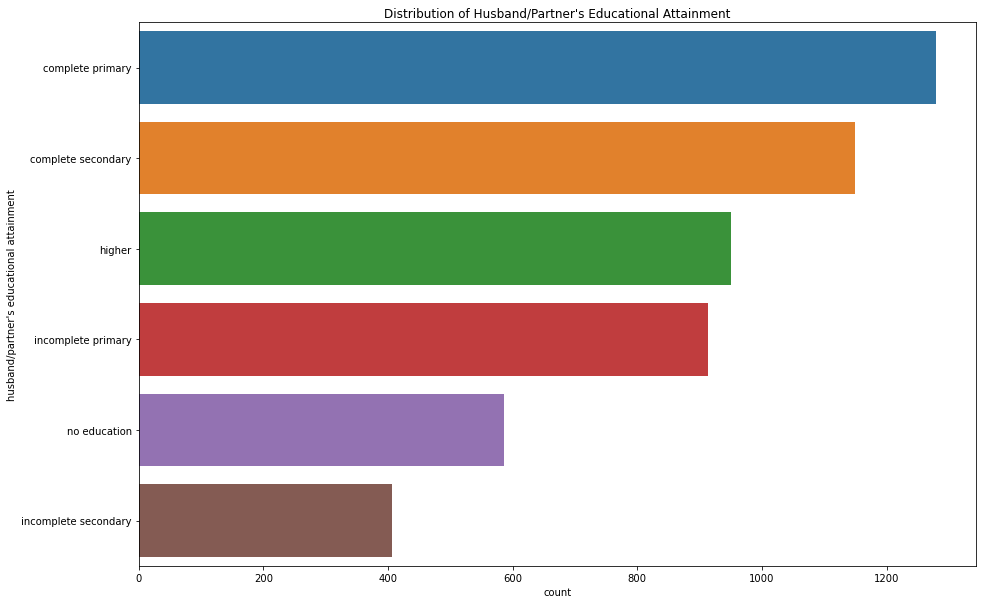

In [65]:
# Plot distribution of Husband/Partner's Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s educational attainment', order=df['husband/partner\'s educational attainment'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Educational Attainment')
plt.show()

**Majority of the workers patners finished primary but very few got to highschool and even fewer got higher education**

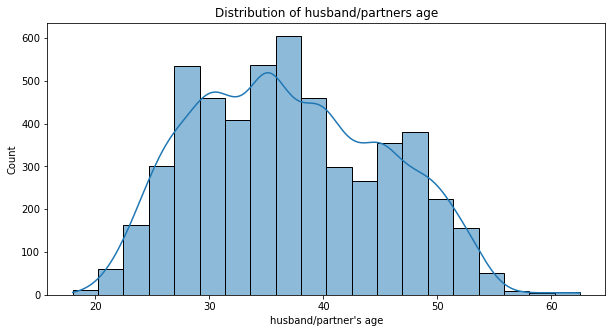

In [66]:
# Plot distribution of husband/partners age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="husband/partner's age", bins=20, kde=True)
plt.title('Distribution of husband/partners age')
plt.show()

**Majority of the patners are between the ages of 30 and 40 years**

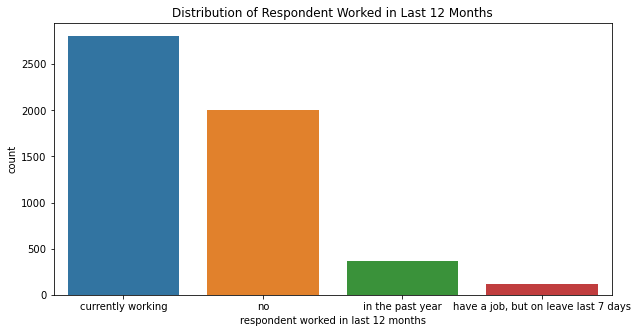

In [67]:
# Plot distribution of Respondent Worked in Last 12 Months
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent worked in last 12 months', order=df['respondent worked in last 12 months'].value_counts().index)
plt.title('Distribution of Respondent Worked in Last 12 Months')
plt.show()

**Majority of Respondent in the Last 12 Months have been working**

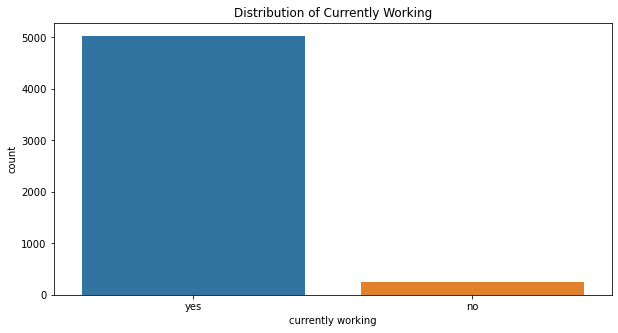

In [68]:
# Plot distribution of Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='currently working', order=df['currently working'].value_counts().index)
plt.title('Distribution of Currently Working')
plt.show()

**Majority are currently working**

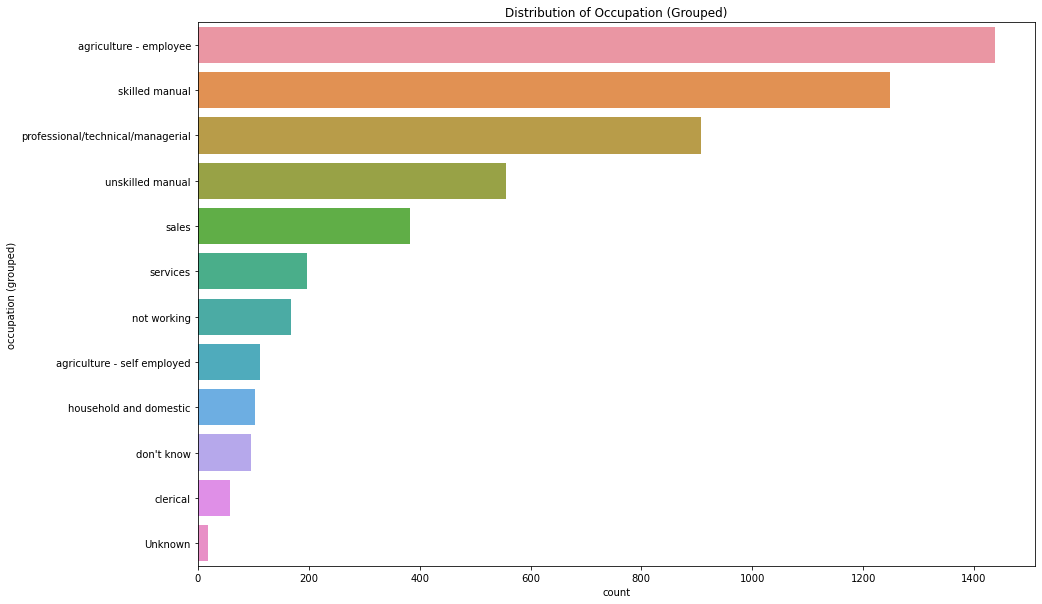

In [69]:
# Plot distribution of Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='occupation (grouped)', order=df['occupation (grouped)'].value_counts().index)
plt.title('Distribution of Occupation (Grouped)')
plt.show()

**Majority of the workers work in agriculture as employees**

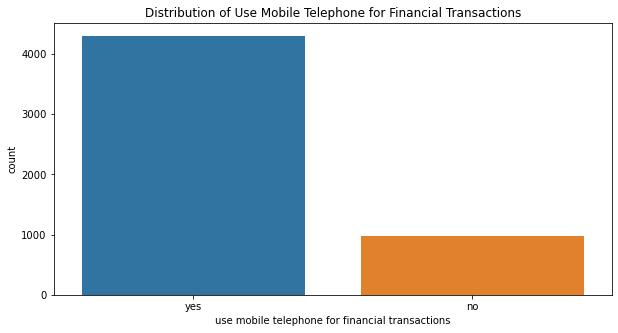

In [70]:
# Plot distribution of Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use mobile telephone for financial transactions', order=df['use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers Use Mobile Telephone for Financial Transactions**

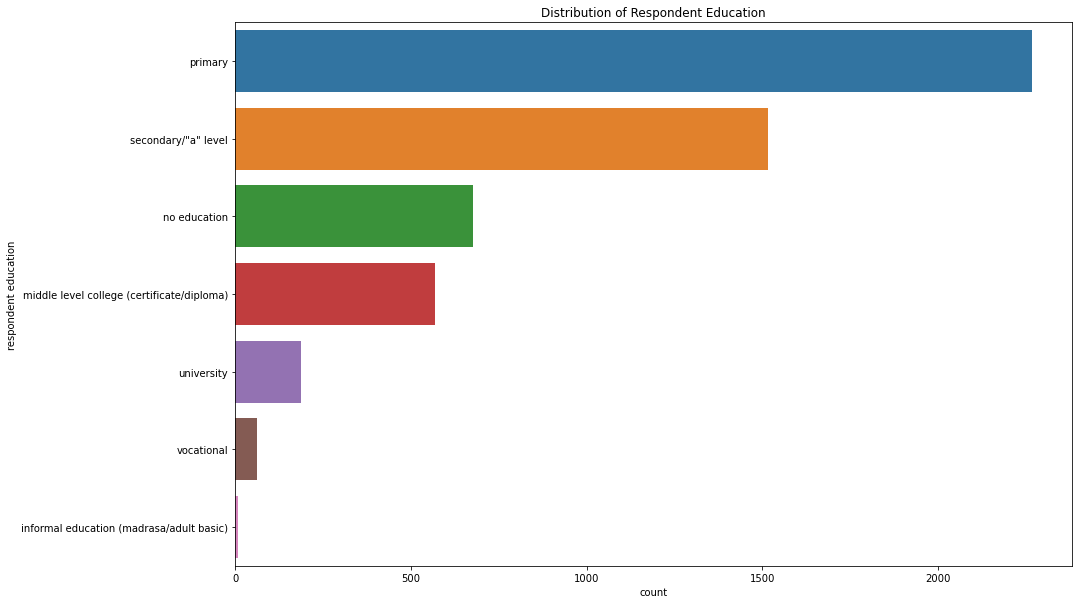

In [71]:
# Plot distribution of Respondent Education
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent education', order=df['respondent education'].value_counts().index)
plt.title('Distribution of Respondent Education')
plt.show()

**Majority of the Respondants completed primary and very few completed high school.For those who completed highschool very few got higher education**

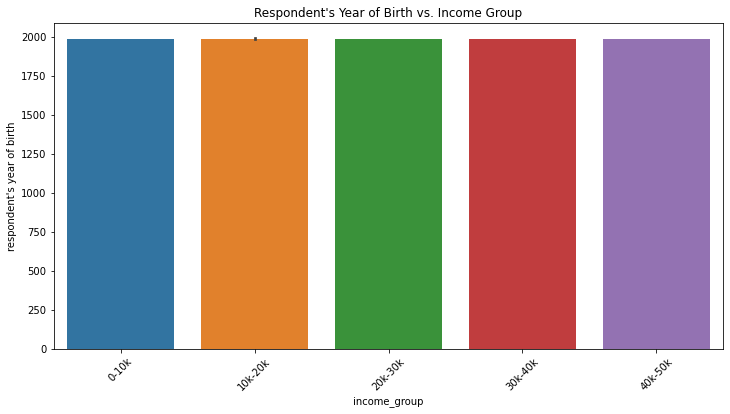

In [72]:
# Respondent's Year of Birth vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y="respondent's year of birth", data=df)
plt.title("Respondent's Year of Birth vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**Respondent's Year of Birth has no impact on their income**

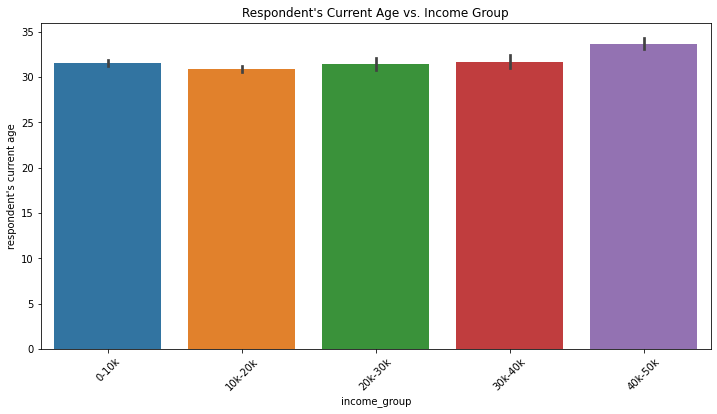

In [73]:
# Respondent's Current Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y="respondent's current age", data=df)
plt.title("Respondent's Current Age vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**Respondent's above the Age of 35 years have more income**

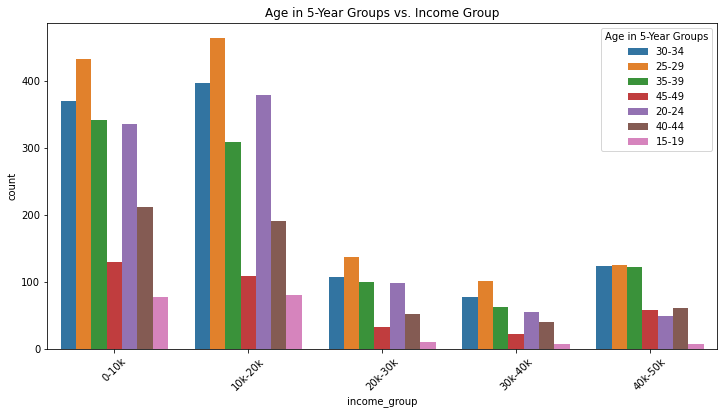

In [74]:
# Age in 5-Year Groups vs. Income Group using Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='age in 5-year groups', data=df)
plt.title("Age in 5-Year Groups vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Age in 5-Year Groups')
plt.show()

**The distribution of income varies across age groups with the 30-34 and 25-29 age ranges having the highest counts across most income groups.**

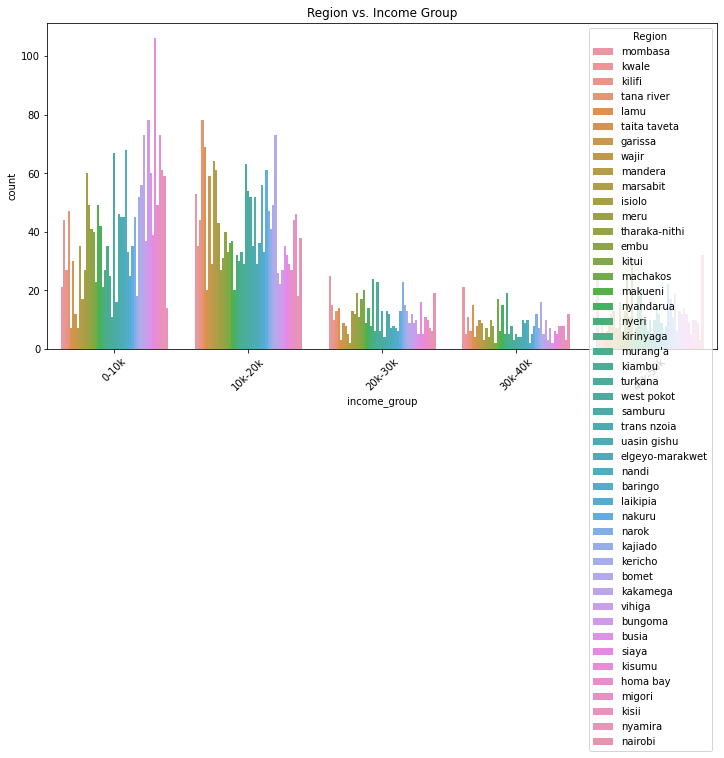

In [75]:
# Region vs. Income Group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='region', data=df)
plt.title("Region vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


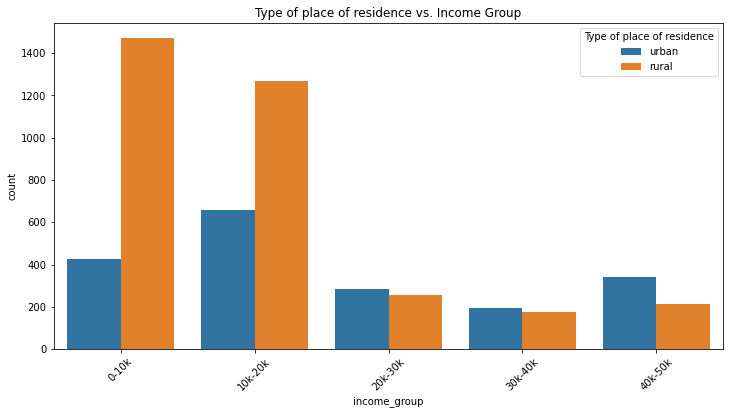

In [76]:
# Type of place of residence vs. Income group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of place of residence', data=df)
plt.title("Type of place of residence vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Type of place of residence')
plt.show()


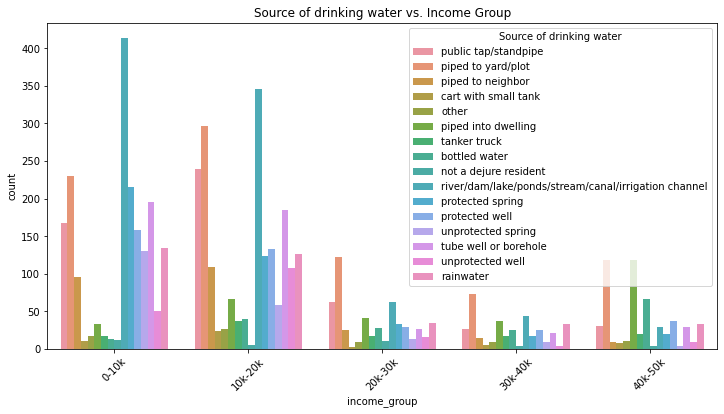

In [77]:
# Source of drinking water vs. Income group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='source of drinking water', data=df)
plt.title("Source of drinking water vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Source of drinking water')
plt.show()


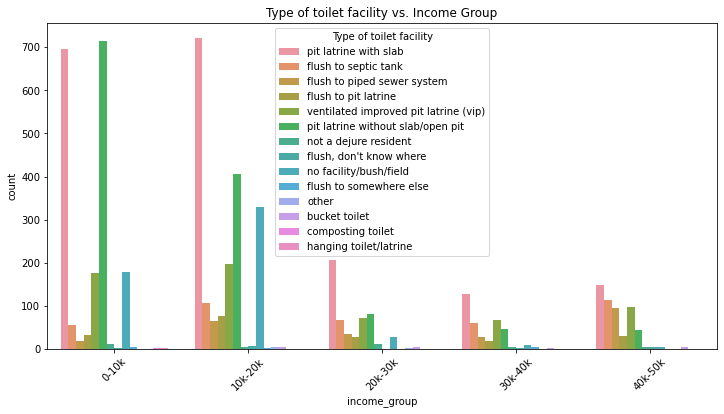

In [78]:
# Type of toilet facility vs. Income group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of toilet facility', data=df)
plt.title("Type of toilet facility vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Type of toilet facility')
plt.show()


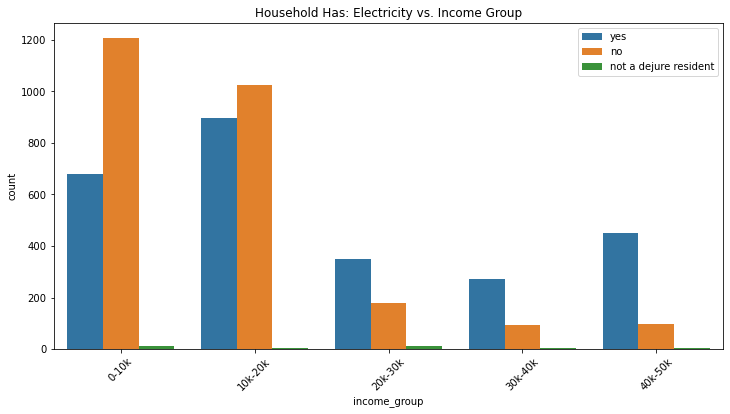

In [79]:
# Household Has: Electricity vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: electricity', data=df)
plt.title("Household Has: Electricity vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of households with electricity is in the high-income group, while the lowest is in the low-income group**

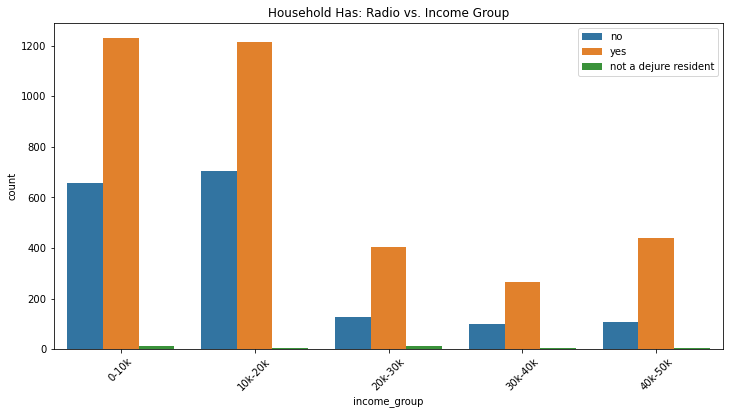

In [80]:
# Household Has: Radio vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: radio', data=df)
plt.title("Household Has: Radio vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with radios is in the 10k-20k income group, while the lowest without radios is in the 30k-40k income group.**

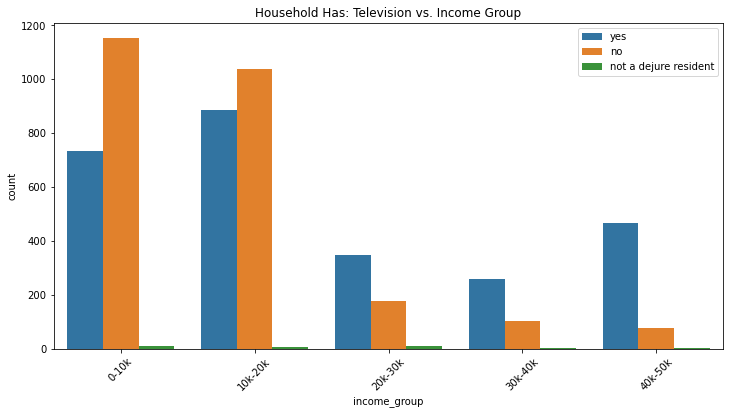

In [81]:
# Household Has: Television vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: television', data=df)
plt.title("Household Has: Television vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with televisions is in the 10k-20k income group, while the lowest televisions is in the 20k-30k income group.**

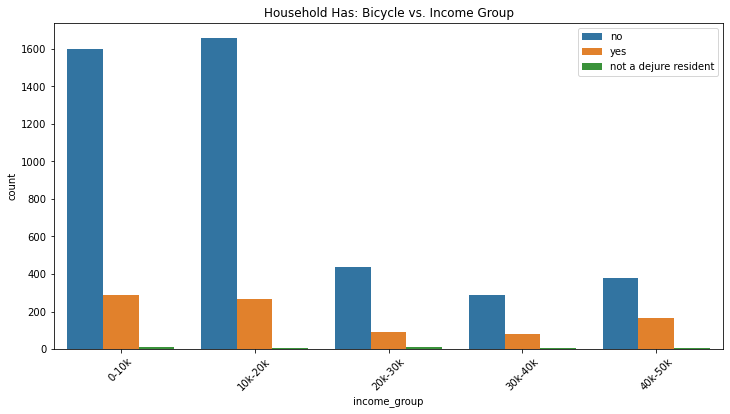

In [82]:
# Household Has: Bicycle vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: bicycle', data=df)
plt.title("Household Has: Bicycle vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with bicycles is in the 10k-20k income group, while the lowest is in the 0-10k and 30k-40k income groups.**

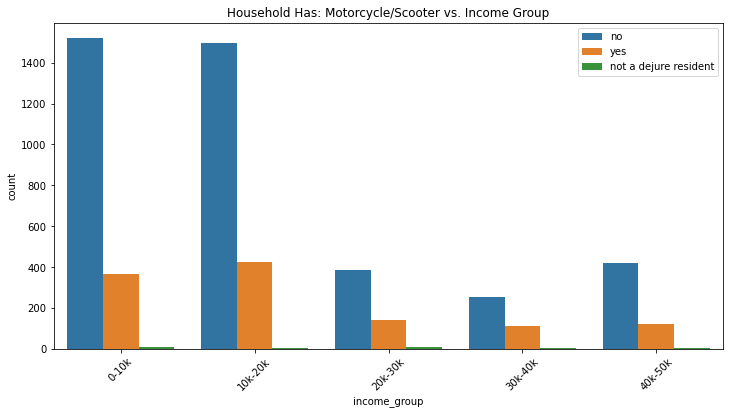

In [83]:
# Household Has: Motorcycle/Scooter vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: motorcycle/scooter', data=df)
plt.title("Household Has: Motorcycle/Scooter vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with motorcycles/scooters is in the 10k-20k income group, while the lowest is in the 0-10k income group.**

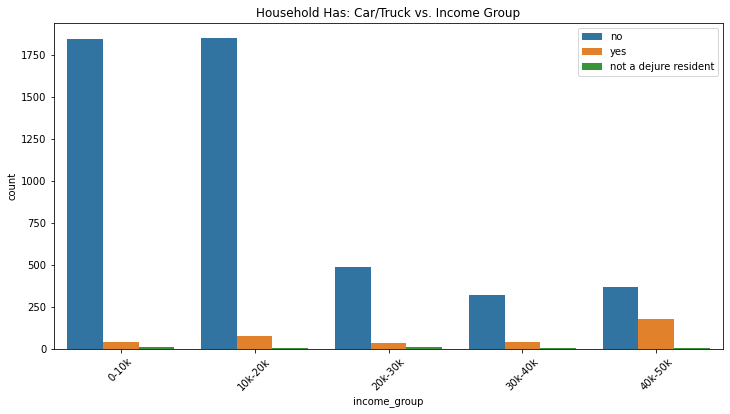

In [84]:
# Household Has: Car/Truck vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: car/truck', data=df)
plt.title("Household Has: Car/Truck vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of households with cars/trucks is in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

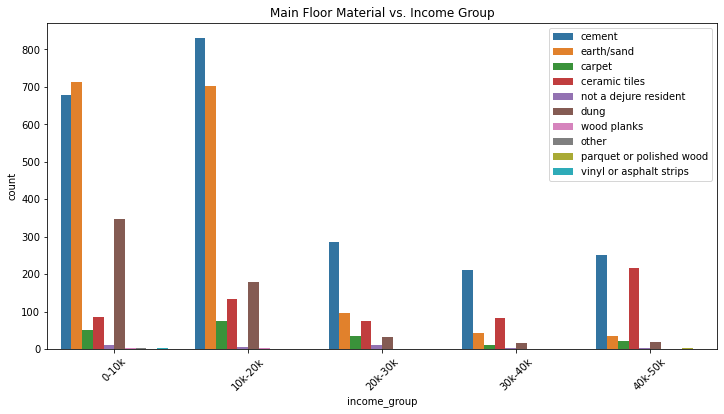

In [85]:
# Plot: Main Floor Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main floor material', data=df)
plt.title("Main Floor Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion have cement floors and the workers in the 10k-20k income group are the highest , while the lowest proportion is in the 40k-50k income group.**

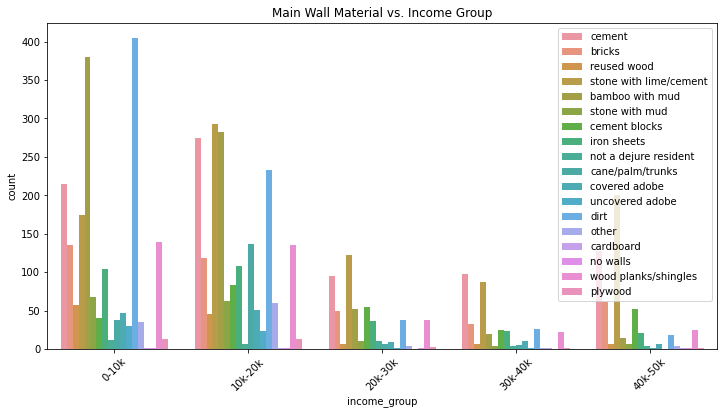

In [86]:
# Main Wall Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main wall material', data=df)
plt.title("Main Wall Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common wall material is mud/unburnt brick.The highest proportion is in the 10k-20k income group, while the lowest proportion is in the 40k-50k income group.**

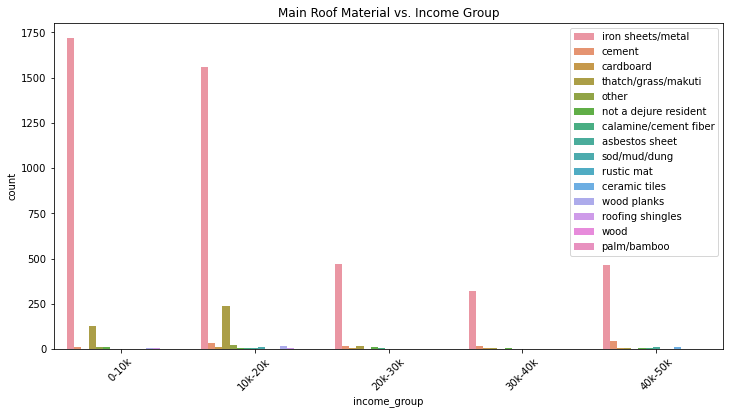

In [87]:
# Main Roof Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main roof material', data=df)
plt.title("Main Roof Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common roof material is iron sheets/metal. The highest proportion is in the 0-10k and 20k-30k income groups, while the lowest is in the 20k-30k and 40k-50k income groups.**

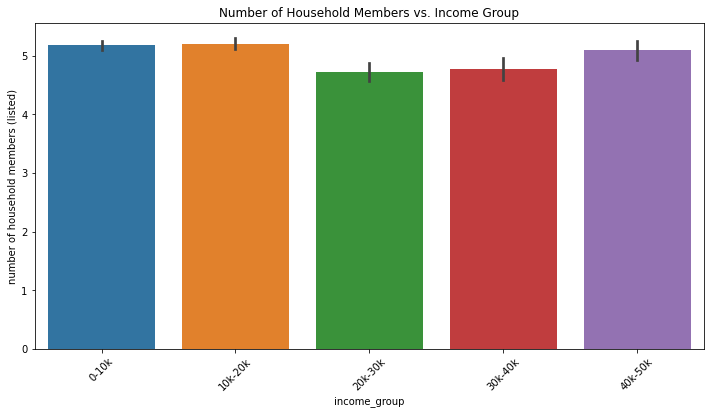

In [88]:
# Number of Household Members vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of household members (listed)', data=df)
plt.title("Number of Household Members vs. Income Group")
plt.xticks(rotation=45)
plt.show()

**The highest number of household members is are in the 0-10k and 10k-20k income groups, while the lowest is in the 20k-30k income group.**

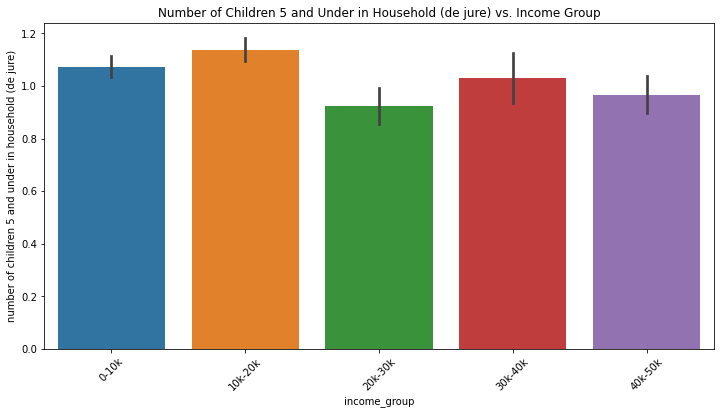

In [89]:
# Number of Children 5 and Under in Household (de jure) vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of children 5 and under in household (de jure)', data=df)
plt.title("Number of Children 5 and Under in Household (de jure) vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average number of children 5 and under have are in the  10k-20k income group, while the lowest is in the 20k-30k income group.**

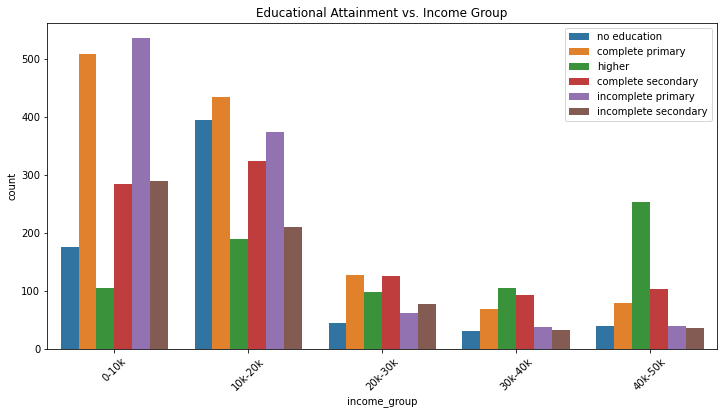

In [90]:
# Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment', data=df)
plt.title("Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of individuals with no education is in the 0-10k income group, while the lowest proportion is in the 40k-50k income group.**

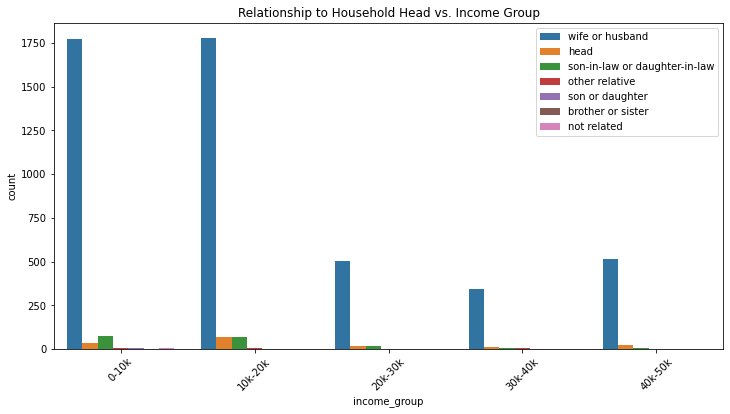

In [91]:
# Relationship to Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='relationship to household head', data=df)
plt.title("Relationship to Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of household heads are in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

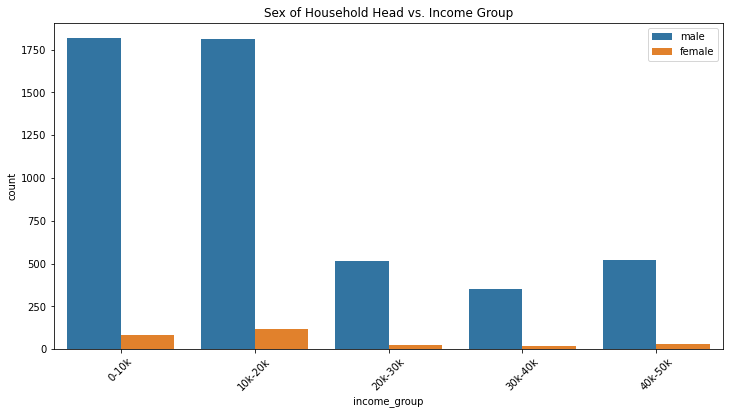

In [92]:
# Sex of Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='sex of household head', data=df)
plt.title("Sex of Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of male household heads are in the 10k-20k income group, while the lowest is in the 20k-30k income group.**

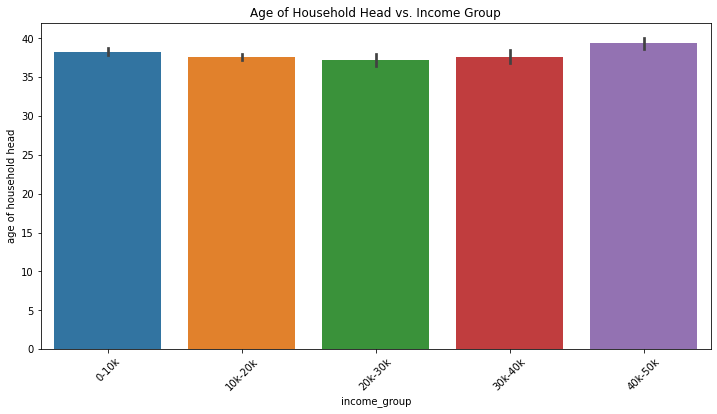

In [93]:
# Age of Household Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='age of household head', data=df)
plt.title("Age of Household Head vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The 35 year old household head are in the 40k-50k income group as the highest.**

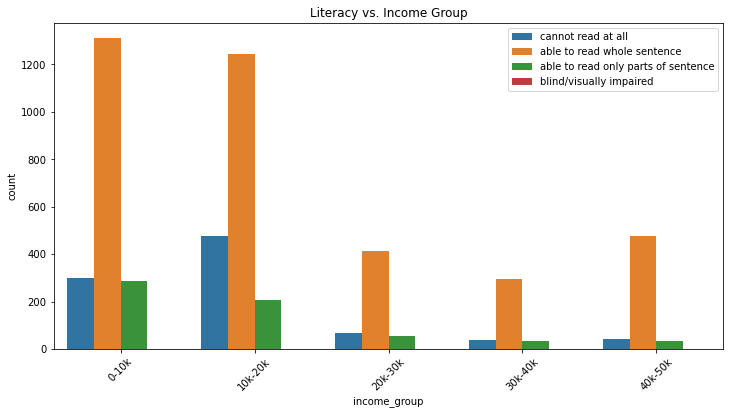

In [94]:
# Literacy vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='literacy', data=df)
plt.title("Literacy vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The workers who are able to read whole sentences have high incomes all through the income groups**

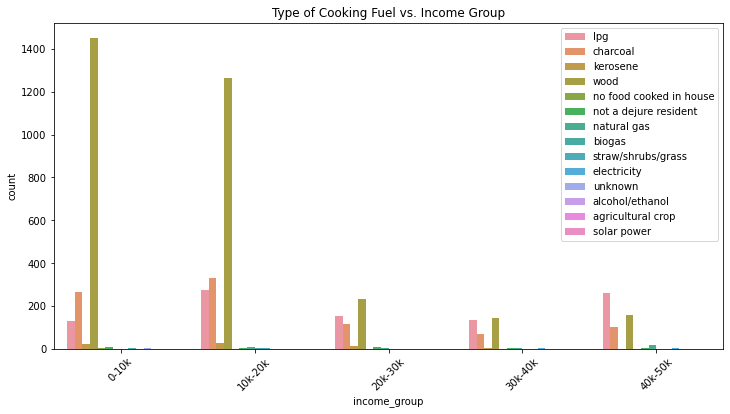

In [95]:
# Type of Cooking Fuel vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of cooking fuel', data=df)
plt.title("Type of Cooking Fuel vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most commonly used cooking fuel is wood in the 0-10k, 10k-20k, and 20k-30k income groups, while electricity is the least used in the 0-10k income group.**

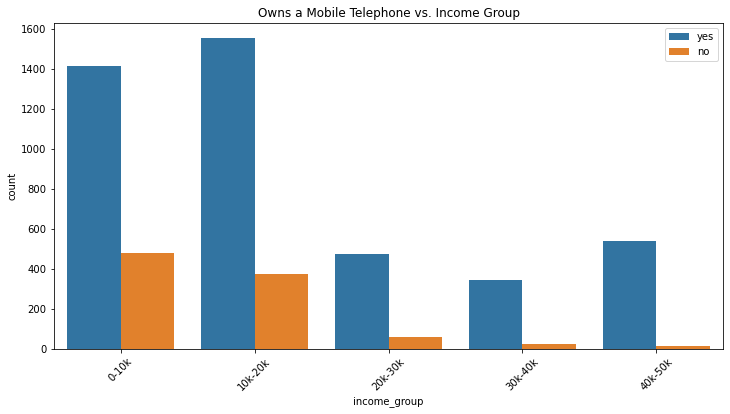

In [96]:
# Owns a Mobile Telephone vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='owns a mobile telephone', data=df)
plt.title("Owns a Mobile Telephone vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of mobile phone ownership is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

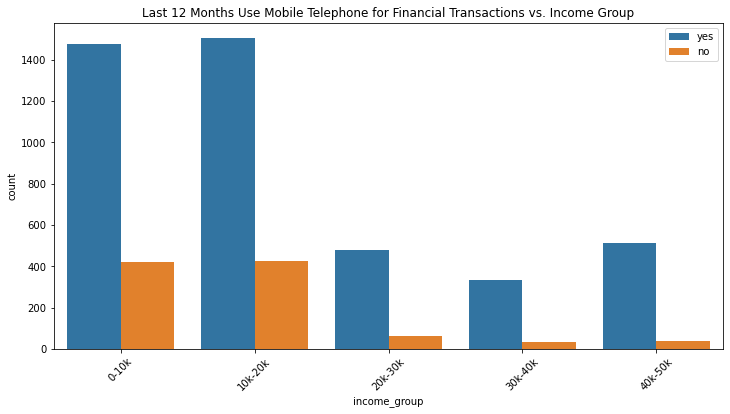

In [97]:
# Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='last 12 months use mobile telephone for financial transactions', data=df)
plt.title("Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest use of mobile phones for financial transactions in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

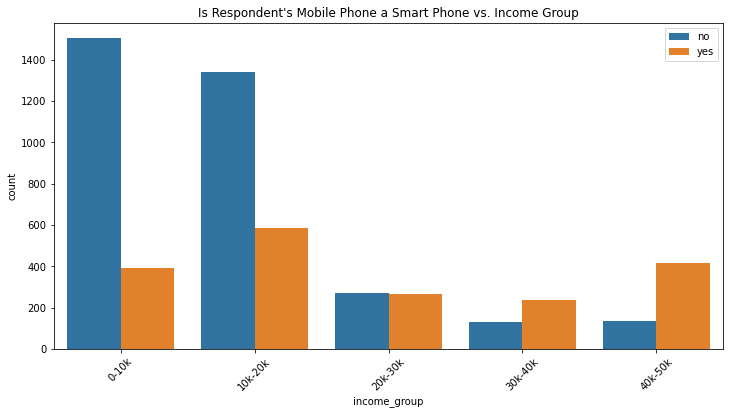

In [98]:
# Is Respondent's Mobile Phone a Smart Phone vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='is respondent\'s mobile phone a smart phone', data=df)
plt.title("Is Respondent's Mobile Phone a Smart Phone vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents with smartphones is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

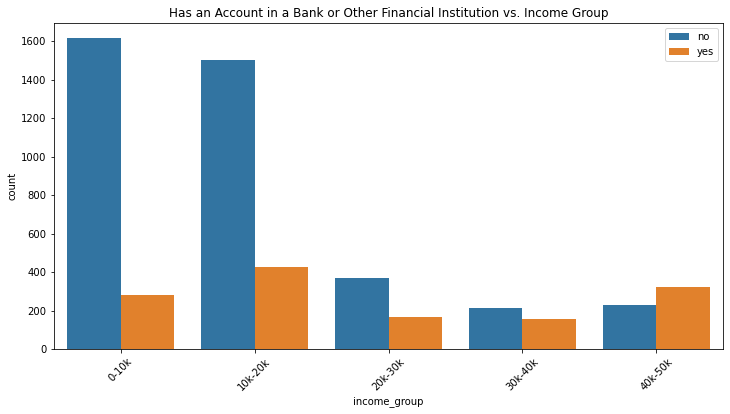

In [99]:
# Has an Account in a Bank or Other Financial Institution vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='has an account in a bank or other financial institution', data=df)
plt.title("Has an Account in a Bank or Other Financial Institution vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals with a bank account is in the 10k-20k income group, while the lowest is in the 40k-50k income group.**

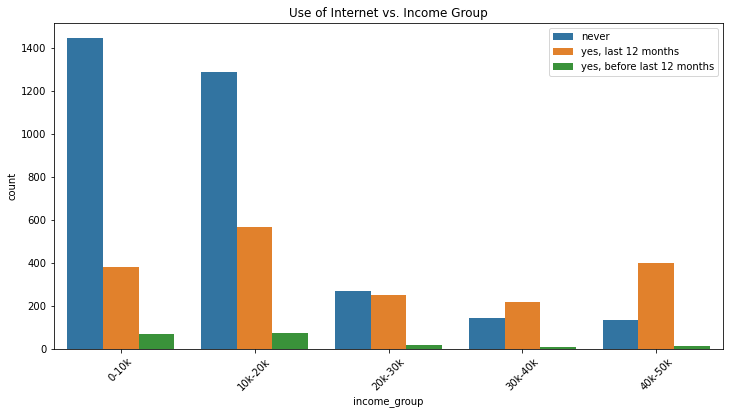

In [100]:
# Use of Internet vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='use of internet', data=df)
plt.title("Use of Internet vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of internet users have used the internet in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

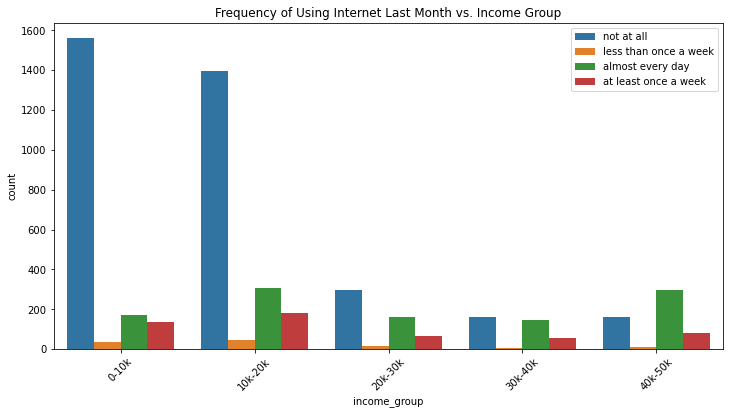

In [101]:
# Frequency of Using Internet Last Month vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of using internet last month', data=df)
plt.title("Frequency of Using Internet Last Month vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of internet users are those who did not use the internet at all last month in the 0-10k and 10k-20k income groups, while in the 40k-50k income group they used the internet almost everyday**

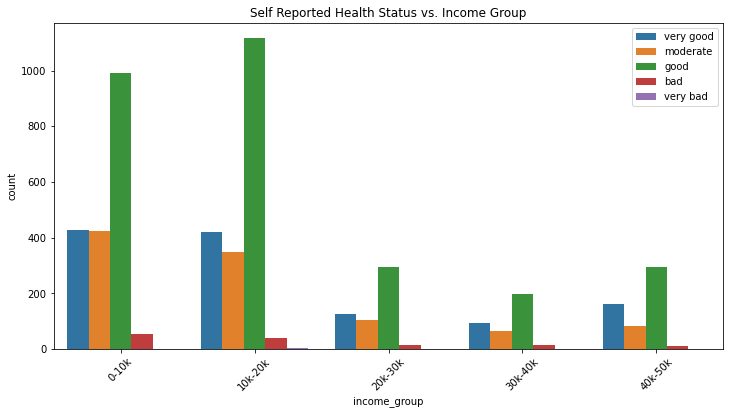

In [102]:
# Self Reported Health Status vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='self reported health status', data=df)
plt.title("Self Reported Health Status vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The highest proportion of individuals reporting "good" health is found in the 10k-20k income group, while the lowest proportion of those reporting "good" health is in the 30k-40k income group.**

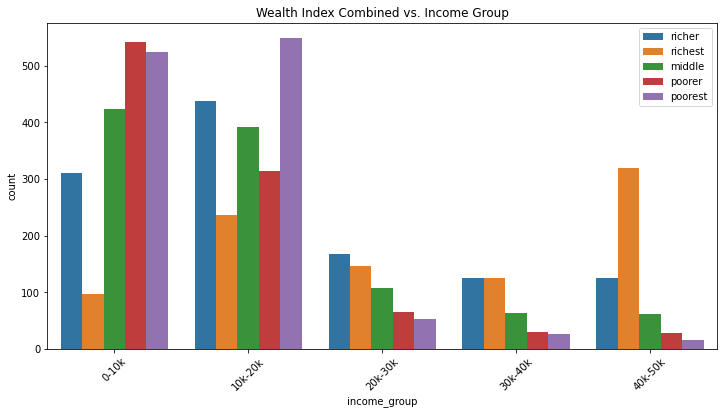

In [103]:
# Wealth Index Combined vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='wealth index combined', data=df)
plt.title("Wealth Index Combined vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The poorest and poorer categories are primarily found in the lowest income group (0-10k) and are almost absent in the highest income group (40k-50k), while the middle, richer, and richest categories are more evenly distributed across income groups, with a higher concentration in the 10k-20k income group for the middle and richer categories and a higher concentration in the 40k-50k income group for the richest category.**

In [104]:
# Years Lived in Place of Residence vs. Income Group



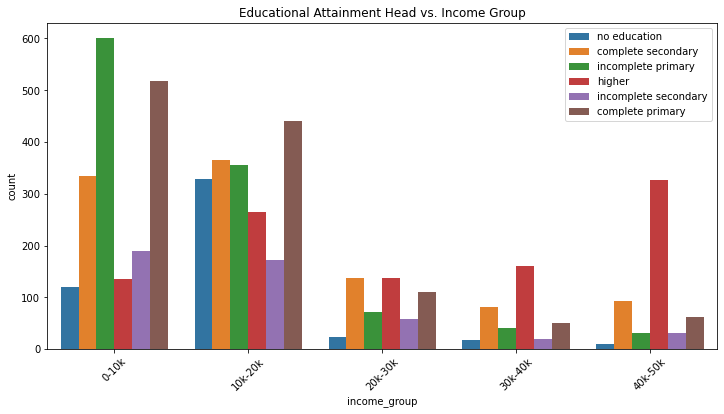

In [105]:
# Educational Attainment Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment head', data=df)
plt.title("Educational Attainment Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The lowest income group (0-10k) has the highest proportion of individuals with no education and the lowest proportion with higher education, while the highest income group (40k-50k) shows the opposite trend, with the lowest proportion of individuals with no education and the highest proportion with higher education.**

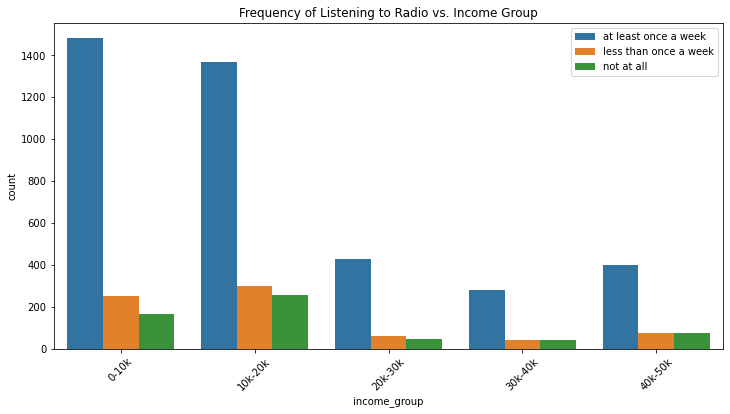

In [106]:
# Frequency of Listening to Radio vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of listening to radio', data=df)
plt.title("Frequency of Listening to Radio vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals who listen to the radio at least once a week is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

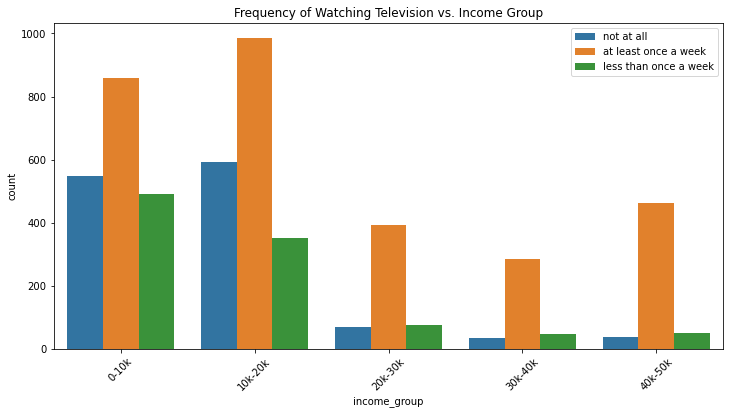

In [107]:
# Frequency of Watching Television vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of watching television', data=df)
plt.title("Frequency of Watching Television vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of individuals who watch television at least once a week is in the 10k-20k income group, while the lowest proportion is in the 30k-40k income group.**

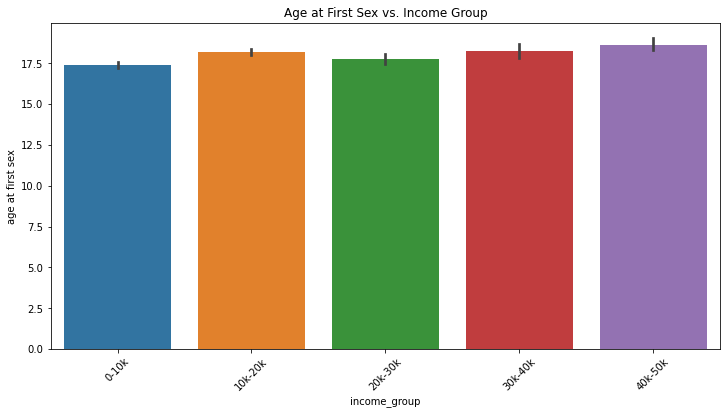

In [108]:
# Age at First Sex vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='age at first sex', data=df)
plt.title("Age at First Sex vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average age at first sex is in the 40k-50k income group, while the lowest is in the 0-10k income group.**

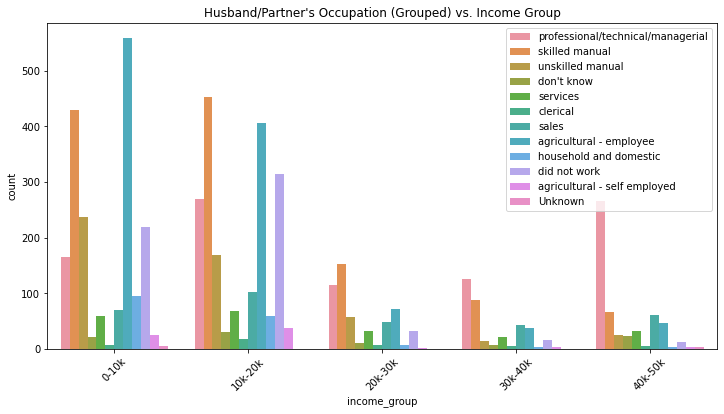

In [109]:
# Husband/Partner's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s occupation (grouped)', data=df)
plt.title("Husband/Partner's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most common occupation for husbands/partners in the 0-10k, 10k-20k, and 20k-30k income groups is agricultural employment, while in the 40k-50k income group, the most common occupation is "unknown."**

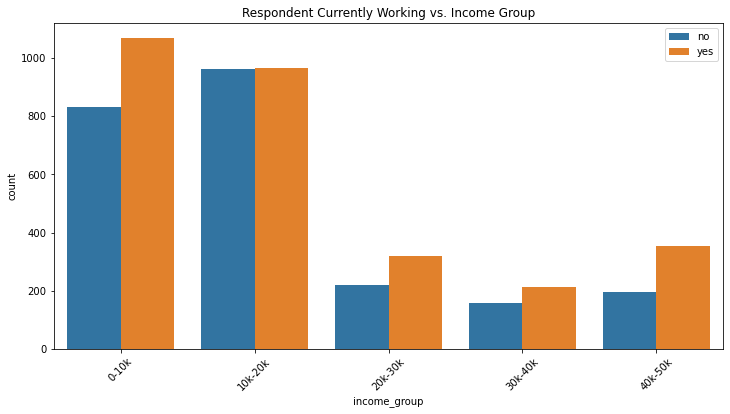

In [110]:
# Respondent Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent currently working', data=df)
plt.title("Respondent Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents currently working is in the 10k-20k and 20k-30k income groups, while the lowest proportion is in the 30k-40k income group.**

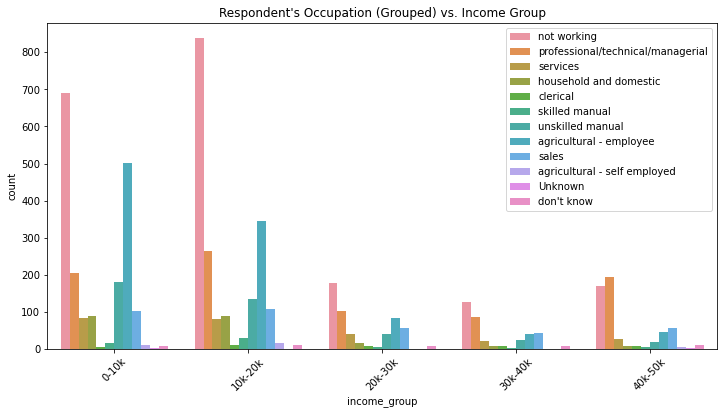

In [111]:
# Respondent's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent\'s occupation (grouped)', data=df)
plt.title("Respondent's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**The most common occupation for respondents across all income groups is 'agricultural - employee', with the highest proportion in the 0-10k income group. However, in the 40k-50k income group, 'not working' becomes the most common occupation, while 'agricultural - employee' remains relatively common, but less so than in lower income groups. 'professional/technical/managerial' and 'don't know' are among the least common occupations across all income levels.**

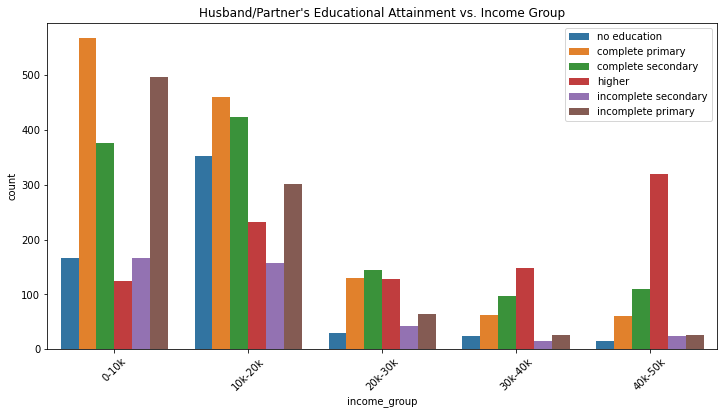

In [112]:
# Husband/Partner's Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s educational attainment', data=df)
plt.title("Husband/Partner's Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The lowest income group (0-10k) has a higher proportion of husbands/partners with no education and incomplete primary education, while the highest income group (40k-50k) has a higher proportion with secondary or higher education.**

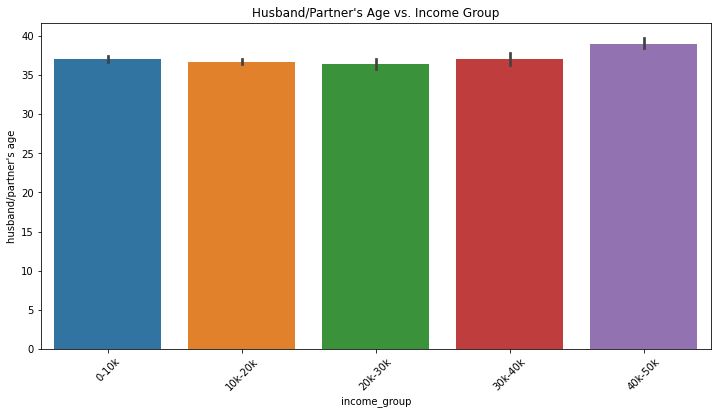

In [113]:
# Husband/Partner's Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='husband/partner\'s age', data=df)
plt.title("Husband/Partner's Age vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average age of husband/partner is in the 40k-50k income group, while the 10k-20k, 20k-30k and 30k-40k income groups have similar average ages.**

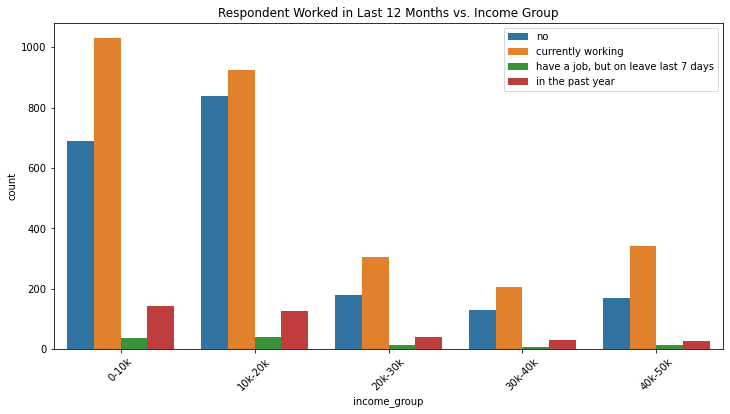

In [114]:
# Respondent Worked in Last 12 Months vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent worked in last 12 months', data=df)
plt.title("Respondent Worked in Last 12 Months vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents who "currently work" or "have a job, but on leave last 7 days" are in the 10k-20k and 20k-30k income groups, while the highest proportion of respondents who "do not work" are in the 0-10k, 30k-40k, and 40k-50k income groups.**

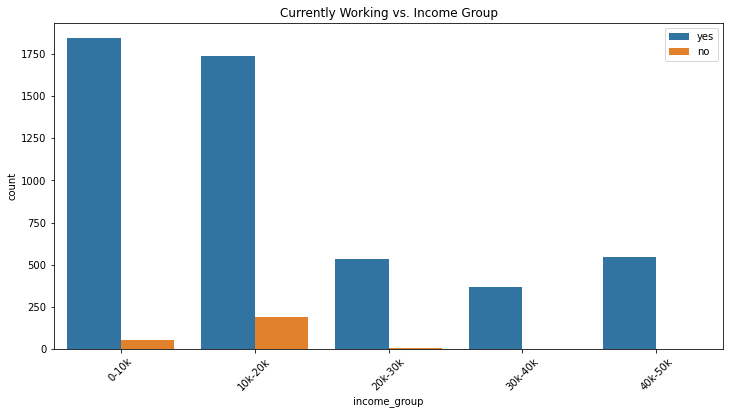

In [115]:
# Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='currently working', data=df)
plt.title("Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents currently working is in the 10k-20k income group, while the lowest proportion of respondents currently working, among those who are employed, is in the 30k-40k income group. However, it's important to note that the 30k-40k and 40k-50k income groups have the highest proportion of individuals who are not currently working at all.**

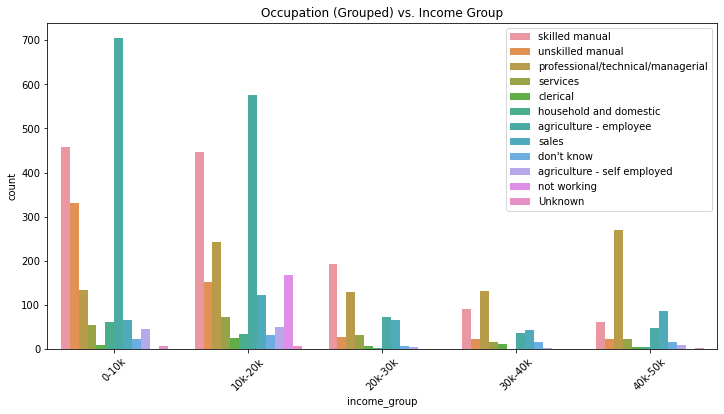

In [116]:
# Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='occupation (grouped)', data=df)
plt.title("Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The most common occupation across all income groups is 'agriculture - employee', with a notable decrease in the 40k-50k income group where 'not working' becomes more prevalent. 'Skilled manual' and 'Unskilled manual' occupations are also quite common across income groups, particularly in the lower to middle-income brackets (0-10k to 20k-30k).  'Professional/technical/managerial' roles are relatively rare across all income levels, slightly increasing in the 40k-50k group.**

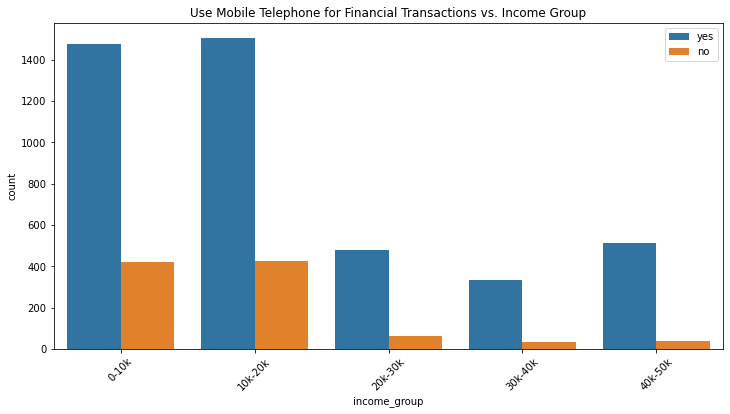

In [117]:
# Use Mobile Telephone for Financial Transactions vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='use mobile telephone for financial transactions', data=df)
plt.title("Use Mobile Telephone for Financial Transactions vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest use of mobile phones for financial transactions in the last 12 months is in the 10k-20k income group, while the lowest is in the 30k-40k income group.**

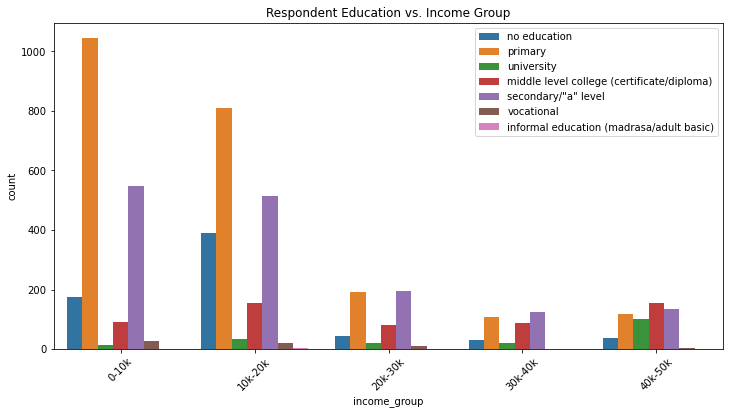

In [118]:
# Respondent Education vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent education', data=df)
plt.title("Respondent Education vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


**The highest proportion of respondents with no education is in the 0-10k income group, followed by the 10k-20k income group, with a decreasing trend as income increases. However, the proportion of respondents with higher education (university and middle-level college) increases with income, with the highest proportion in the 40k-50k income group.**

## **STATISTICAL ANALYSIS📉**

**Descriptive statistics**

In [119]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent's year of birth,5285.0,1989.861495,7.712454,1972.0,1984.0,1991.0,1996.0,2007.0
respondent's current age,5285.0,31.533207,7.728593,15.0,25.0,31.0,37.0,49.0
number of household members (listed),5285.0,5.100473,1.918951,2.0,4.0,5.0,6.0,9.0
number of children 5 and under in household (de jure),5285.0,1.067360,0.902098,0.0,0.0,1.0,2.0,5.0
age of household head,5285.0,38.005866,9.050188,18.0,31.0,37.0,45.0,66.0
age at first sex,5285.0,17.918070,4.087379,8.0,15.0,17.0,20.0,27.5
husband/partner's age,5285.0,37.066414,8.212131,18.0,30.0,36.0,43.0,62.5
how much paid in last month.1,5285.0,14670.380889,11818.674026,0.0,6000.0,10000.0,20000.0,41000.0


**Insights**

Year of Birth: Mean = 1989.86, Range = 1972 to 2007

Current Age: Mean = 31.53 years, Range = 15 to 49 years

Household Members: Mean = 5.10, Range = 2 to 9 members

Children Under 5: Mean = 1.07, Range = 0 to 5 children

Household Head Age: Mean = 38.01 years, Range = 18 to 66 years

Age at First Sex: Mean = 17.92 years, Range = 8 to 27.5 years

Partner's Age: Mean = 37.07 years, Range = 18 to 62.5 years

Monthly Income: Mean = KES 14,670.38, Range = KES 0 to KES 41,000



**Correlation Analysis**

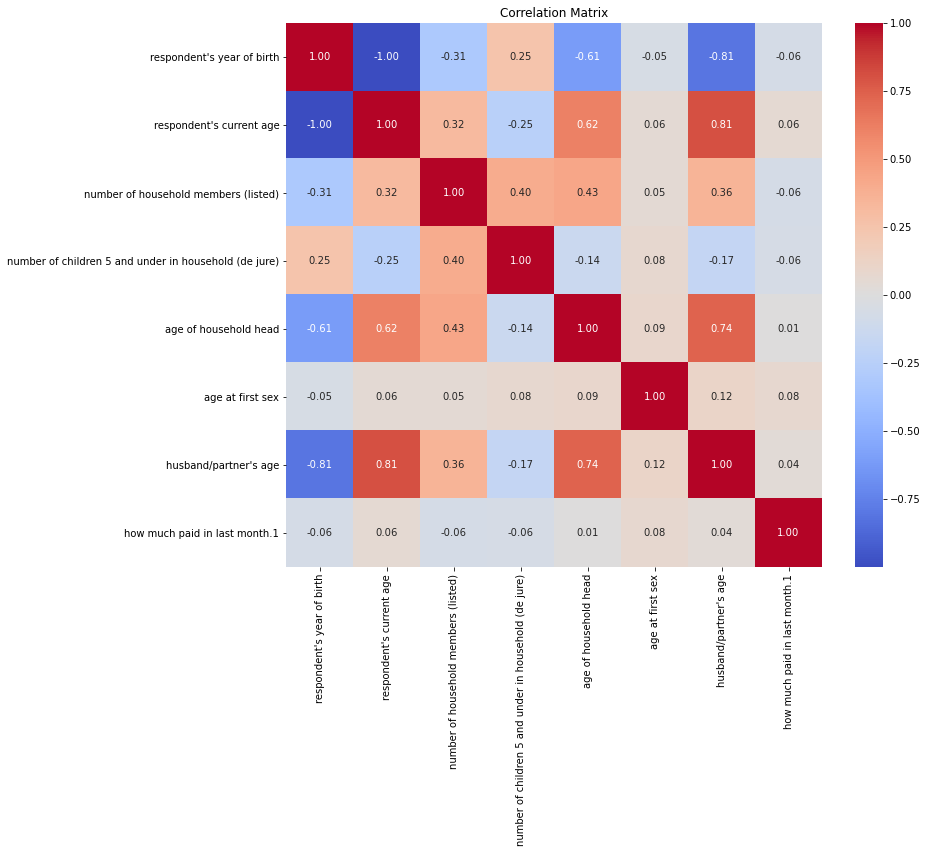

In [120]:
# Correlation Analysis

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows strong positive correlation between age and years of birth for both respondents and their husbands/partners, a moderate positive correlation between the number of household members and the number of children under 5, and a weak negative correlation between the respondent's age and the number of children under 5.

**kruskal Wallis and Hypothesis Testing**

**The Kruskal-Wallis test was used to determine if there are significant income differences based on various socio-demographic factors. The test was chosen due to its non-parametric nature, which does not assume a normal distribution of the data.**

In [121]:
def perform_kruskal_wallis_test(df):
    """
    Perform the Kruskal-Wallis H test for each specified column in the DataFrame
    against the 'income_group' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Prints out the test results for each column.
    """

    income_column = 'how much paid in last month.1'

    # List of columns to test
    columns = [
        "respondent's year of birth",
        "respondent's current age",
        'age in 5-year groups',
        'region',
        'type of place of residence',
        'source of drinking water',
        'type of toilet facility',
        'household has: electricity',
        'household has: radio',
        'household has: television',
        'household has: bicycle',
        'household has: motorcycle/scooter',
        'household has: car/truck',
        'main floor material',
        'main wall material',
        'main roof material',
        'number of household members (listed)',
        'number of children 5 and under in household (de jure)',
        'educational attainment',
        'relationship to household head',
        'sex of household head',
        'age of household head',
        'literacy',
        'type of cooking fuel',
        'owns a mobile telephone',
        'last 12 months use mobile telephone for financial transactions',
        "is respondent's mobile phone a smart phone",
        'has an account in a bank or other financial institution',
        'use of internet',
        'frequency of using internet last month',
        'self reported health status',
        'wealth index combined',
        'years lived in place of residence',
        'educational attainment head',
        'frequency of listening to radio',
        'frequency of watching television',
        'age at first sex',
        "husband/partner's occupation (grouped)",
        'respondent currently working',
        "respondent's occupation (grouped)",
        "husband/partner's educational attainment",
        "husband/partner's age",
        'respondent worked in last 12 months',
        'currently working',
        'occupation (grouped)',
        'use mobile telephone for financial transactions',
        'respondent education',
    ]

    # Setting significance level
    alpha = 0.05

    # Iterate over each column
    for column in columns:
        if column not in df.columns:
            continue

        # Create groups for the Kruskal-Wallis test
        groups = [df[df[column] == value][income_column] for value in df[column].unique()]

        # Check if there are enough groups to perform the test
        if len(groups) < 2:
            print(f"Not enough groups for testing {column}. Skipping...")
            continue

        # Perform the Kruskal-Wallis H Test
        statistic, p_value = kruskal(*groups)
        print(f"\n{column} vs. {income_column}")
        print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

        if p_value < alpha:
            print(f"Reject H0: There is evidence of income differences based on {column}.")
        else:
            print(f"Fail to reject H0: Insufficient evidence to suggest income differences based on {column}.")

perform_kruskal_wallis_test(df)



respondent's year of birth vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.86, p-value = 0.0112
Reject H0: There is evidence of income differences based on respondent's year of birth.

respondent's current age vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.54, p-value = 0.0089
Reject H0: There is evidence of income differences based on respondent's current age.

age in 5-year groups vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 20.56, p-value = 0.0022
Reject H0: There is evidence of income differences based on age in 5-year groups.

region vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 555.09, p-value = 0.0000
Reject H0: There is evidence of income differences based on region.

type of place of residence vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 478.18, p-value = 0.0000
Reject H0: There is evidence of income differences based on type of place of residence.

source of drinking water vs. how much paid in la


husband/partner's age vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 71.92, p-value = 0.0027
Reject H0: There is evidence of income differences based on husband/partner's age.

respondent worked in last 12 months vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 7.58, p-value = 0.0556
Fail to reject H0: Insufficient evidence to suggest income differences based on respondent worked in last 12 months.

currently working vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 25.19, p-value = 0.0000
Reject H0: There is evidence of income differences based on currently working.

occupation (grouped) vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 998.55, p-value = 0.0000
Reject H0: There is evidence of income differences based on occupation (grouped).

use mobile telephone for financial transactions vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 106.12, p-value = 0.0000
Reject H0: There is evidence of income differences based on use

## **DATA PREPROCESSING**

**FEATURE ENGINEERING**

**All categorical features in the dataframe are transformed to numerical, ready for machine learning algorithms.**

In [122]:
# Feature Engineering
# Encode categorical features

object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()

,respondent's year of birth,respondent's current age,age in 5-year groups,region,type of place of residence,source of drinking water,type of toilet facility,household has: electricity,household has: radio,household has: television,...,respondent's occupation (grouped),husband/partner's educational attainment,husband/partner's age,respondent worked in last 12 months,currently working,occupation (grouped),use mobile telephone for financial transactions,respondent education,how much paid in last month.1,income_group
0,1987.0,34.0,3,27,1,9,11,2,0,2,...,6,5,35.0,3,1,10,1,2,35000.0,3
1,1992.0,30.0,3,27,1,6,4,2,2,2,...,7,0,35.0,0,1,10,1,3,20000.0,2
2,1993.0,28.0,2,27,1,9,11,2,2,2,...,6,1,34.0,3,1,11,1,5,41000.0,4
3,1995.0,27.0,2,27,1,5,4,0,0,0,...,6,5,37.0,3,1,10,1,2,12000.0,1
4,1994.0,28.0,2,27,1,1,2,2,2,2,...,6,2,28.0,3,1,7,1,1,30000.0,3


**TRAIN-TEST SPLIT**

**Divide the data into two parts: one for training the model and one for testing it. This helps evaluate how well the model will perform on new, unseen data**

In [123]:
# Train-test Split
X = df.drop(columns='income_group')
y = df['income_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3699, 48)
Shape of X_test: (1586, 48)
Shape of y_train: (3699,)
Shape of y_test: (1586,)


**FEATURE SCALING**

**Feature scaling standardizes the range of independent variables or features of data.MinMax scaling is used to normalize features to a specific range, typically 0 to 1, ensuring all features contribute equally to the model and improving performance for algorithms sensitive to feature scales.**

In [124]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

**CHECKING CLASS DISTRIBUTION**

**Checking the class distibution for the target variable class.**

Class distribution before resampling:
1    1351
0    1336
4     377
2     364
3     271
Name: income_group, dtype: int64


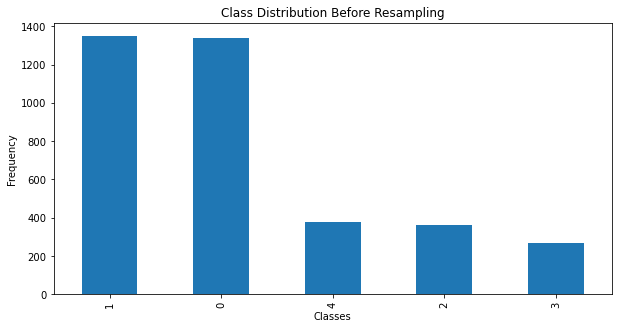

In [125]:
# Checking the distribution of the target variable
print("Class distribution before resampling:")
print(y_train.value_counts())

# Plot the class distribution before resampling
plt.figure(figsize=(10, 5))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

**HANDLING CLASS IMBALANCE USING SMOTE**

**SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by generating synthetic samples for the minority classes. Balancing the class distribution ensures that the model does not become biased towards the majority class, leading to improved accuracy and performance for all classes.**

Class distribution after resampling:
3    1351
2    1351
1    1351
4    1351
0    1351
Name: income_group, dtype: int64


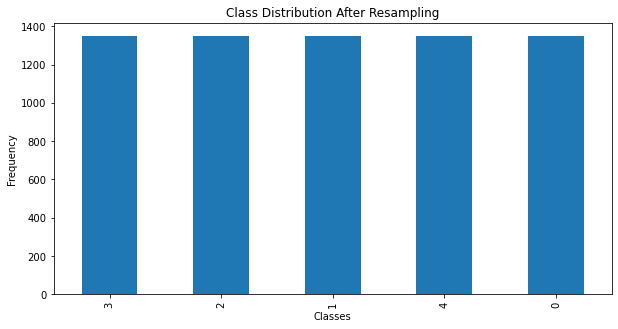

In [126]:
# Applying SMOTE to handle the imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rescaled, y_train)

# Check the distribution after resampling
print("Class distribution after resampling:")
print(y_train_resampled.value_counts())

# Plot the class distribution after resampling
plt.figure(figsize=(10, 5))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


**DIMENTIONAL REDUCTION USING PCA**

**To improve the performance of your model, we can apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. PCA helps in identifying the most important features and reducing the noise in the data, which can lead to better model performance**

In [127]:
# Dimensional Reduction using PCA
from sklearn.decomposition import PCA

n_features = X_train_resampled.shape[1]

# Set the number of components for PCA
n_components = min(n_features, n_features)

# Applying PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_rescaled)


**STANDARDIZATION**

**Standardization is applied to scale the features to have a mean of zero and a standard deviation of one. This ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process. It improves the performance and convergence speed of machine learning algorithms.**

In [128]:
# Standardization
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Displaying the first few rows of the standardized data
print("First few rows of standardized PCA transformed data:")
pd.DataFrame(X_train_pca_scaled).head()

First few rows of standardized PCA transformed data:


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.422144,1.313118,-0.508286,0.322123,0.684324,-0.110058,0.499491,0.046164,0.172304,0.279346,...,0.986632,-0.683928,-0.221745,0.652119,0.979409,-0.267715,-0.074509,1.262132,1.386901,0.715125
1,-1.391014,-0.057169,1.504172,-0.333483,-0.738208,-0.888361,0.316520,2.181908,2.779740,-0.492875,...,-0.084376,-0.636810,-1.138355,0.771980,0.176988,0.035175,-0.082509,1.397633,-1.289086,1.268494
2,1.224069,0.852615,1.036862,-0.138786,1.589353,-0.103527,0.189040,0.212935,1.110946,0.457897,...,-0.040635,0.437661,0.257324,-0.913914,0.059581,-0.061662,0.273267,0.056115,1.813675,0.647819
3,1.344028,-0.749906,0.348444,0.101205,-0.501459,2.511675,-0.209490,1.314565,0.354645,0.971325,...,-1.241818,1.389535,3.460125,-0.279010,0.811951,-3.260897,1.468721,-0.871685,-0.407771,0.242362
4,-0.623181,-0.645362,-0.603400,1.475947,0.355749,0.170597,-1.475638,0.698925,-0.571607,1.189004,...,-0.430278,-1.368515,-1.487299,0.737216,-0.986509,-3.036980,-0.258867,-0.968262,-0.610707,-1.010137


**CROSS VALIDATION USING RANDOM FOREST CLASSIFIER**

**Cross-validation is used to evaluate the performance of the Random Forest classifier more reliably. By splitting the data into multiple folds and training the model on different subsets of the data, cross-validation provides a more accurate estimate of the model's performance and helps prevent overfitting**

In [129]:
# Cross Validation
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
cv_scores = cross_val_score(clf, X_train_pca_scaled, y_train_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.76757957 0.79570688 0.81273131 0.78682457 0.81051073]
Mean cross-validation score: 0.7946706143597335


The Random Forest Classifier shows consistent and strong performance with cross-validation scores around 0.800, indicating reliable generalization to new data.

**REGULARIZATION WITH RIDGE CLASSIFIER**

**Regularization with Ridge Classifier helps prevent overfitting by penalizing large coefficients. This ensures that the model generalizes better to new data, particularly when dealing with multicollinearity or when there are many features**

In [130]:
# Regularization with Ridge Classifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge_cv_scores = cross_val_score(ridge, X_train_pca_scaled, y_train_resampled, cv=5)
print("Ridge Cross-validation scores:", ridge_cv_scores)
print("Mean Ridge Cross-validation score:", ridge_cv_scores.mean())


Ridge Cross-validation scores: [0.58253146 0.607698   0.61139896 0.59363434 0.61139896]
Mean Ridge Cross-validation score: 0.6013323464100666


The Ridge Classifier demonstrates moderate performance with an average cross-validation score of approximately 0.599, indicating some challenges in model accuracy and generalization.

**PRUNING WITH GRADIENT BOOSTING CLASSIFIER**

**Pruning in Gradient Boosting Classifier is used to limit the maximum depth of the individual trees, which helps to reduce overfitting by simplifying the model.**

In [131]:
# Pruning with Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gbc_cv_scores = cross_val_score(gbc, X_train_pca_scaled, y_train_resampled, cv=5)
print("Gradient Boosting Cross-validation scores:", gbc_cv_scores)
print("Mean Gradient Boosting Cross-validation score:", gbc_cv_scores.mean())

Gradient Boosting Cross-validation scores: [0.70762398 0.74093264 0.80458919 0.76017765 0.78164323]
Mean Gradient Boosting Cross-validation score: 0.7589933382679497


The cross-validation scores for the Gradient Boosting Classifier show consistent performance across different folds, with a mean score of approximately 0.769, indicating a well-generalized model.

**CHECKING MULTICOLINEARITY**

**To check for multicollinearity, we used Variance Inflation Factor (VIF) analysis. VIF quantifies how much a feature's variance is inflated due to multicollinearity with other features. High VIF values (above 10) indicate significant multicollinearity, suggesting that the respective feature might be redundant and could be considered for removal to improve model performance.**

In [132]:
# Checking Multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rescaled = sm.add_constant(X_train_rescaled)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rescaled, i) for i in range(X_train_rescaled.shape[1])]

print(vif_data)

                                              feature          VIF
0                          respondent's year of birth  5504.107068
1                            respondent's current age   267.920800
2                                age in 5-year groups   298.936850
3                                              region    30.778886
4                          type of place of residence     1.064686
5                            source of drinking water     2.207218
6                             type of toilet facility     1.368022
7                          household has: electricity     1.423492
8                                household has: radio     2.062077
9                           household has: television     1.318822
10                             household has: bicycle     2.136698
11                  household has: motorcycle/scooter     1.099497
12                           household has: car/truck     1.140866
13                                main floor material     1.26

**FEATURE SELECTION USING VIF**

**We performed feature selection using Variance Inflation Factor (VIF) to identify and remove features with high multicollinearity.**

In [133]:
# Feature Selection using VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_rescaled_df = pd.DataFrame(X_test_rescaled, columns=X.columns)

while True:
    modelling_df = calculate_vif(X_train_resampled_df)
    max_vif = modelling_df['VIF'].max()
    if max_vif > 10:
        drop_feature = modelling_df.sort_values('VIF', ascending=False).iloc[0]['feature']
        X_train_resampled_df.drop(columns=drop_feature, inplace=True)
        X_test_rescaled_df.drop(columns=drop_feature, inplace=True)
    else:
        break

print("Remaining features after VIF check:")
print(modelling_df)

Remaining features after VIF check:
                                              feature       VIF
0                                age in 5-year groups  7.826036
1                                              region  4.352057
2                          type of place of residence  3.995500
3                            source of drinking water  8.013975
4                          household has: electricity  5.972113
5                                household has: radio  4.824490
6                           household has: television  6.043604
7                              household has: bicycle  1.397300
8                   household has: motorcycle/scooter  1.515203
9                            household has: car/truck  1.493025
10                                main floor material  4.636530
11                                 main wall material  3.344805
12               number of household members (listed)  6.754857
13  number of children 5 and under in household (d...  4.102055
14  

In [134]:
# Reassigning columns after feature selection
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_test_rescaled = pd.DataFrame(X_test_rescaled, columns=X_test.columns)

After performing feature selection using VIF, we reassigned the columns to the training and testing datasets. This step ensures that the datasets contain only the selected features, which helps improve the model's performance and interpretability.

## **MODELING**

**LOGISTIC REGRESSION**

**This is the baseline model**

In [135]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_rescaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9022698612862547
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       561
           1       0.92      0.87      0.89       577
           2       0.75      0.84      0.79       175
           3       0.79      0.90      0.84        99
           4       0.96      0.99      0.98       174

    accuracy                           0.90      1586
   macro avg       0.87      0.91      0.89      1586
weighted avg       0.91      0.90      0.90      1586

Confusion Matrix for Logistic Regression:
[[521  40   0   0   0]
 [ 31 501  45   0   0]
 [  0   5 147  23   0]
 [  0   0   3  89   7]
 [  0   0   0   1 173]]


Accuracy: The model achieved an accuracy of 90.73%.

Classification Report: Precision, recall, and F1-scores were generally high across most classes, indicating good performance.

Confusion Matrix: Most predictions were correct, with few misclassifications across different classes.

**Hyperparameter Tunning**

In [160]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
logistic_params = {
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 500],  # Maximum number of iterations
}

# Initialize Logistic Regression
logistic_clf = LogisticRegression(multi_class='multinomial')

# Set up GridSearchCV
logistic_grid_search = GridSearchCV(estimator=logistic_clf, param_grid=logistic_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
logistic_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
logistic_best_params = logistic_grid_search.best_params_
logistic_best_score = logistic_grid_search.best_score_

print("Best Logistic Regression Parameters:", logistic_best_params)
print("Best Logistic Regression Score:", logistic_best_score)


Best Logistic Regression Parameters: {'max_iter': 500, 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.9332346410066616


Best Parameters: The optimal parameters were found to be C: 100.0, max_iter: 500, and solver: 'lbfgs'.

Best Score: The best cross-validation score achieved was 93.32%.

This tuning significantly improved the model's performance, demonstrating the importance of selecting the right hyperparameters for Logistic Regression.

**RIDGE CLASSIFIER**

 **Helps to handle multicollinearity and regularizes the model to prevent overfitting.**

In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Ridge Classifier
ridge_clf = RidgeClassifier()

# Fit the model
ridge_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_ridge_clf = ridge_clf.predict(X_test_rescaled)

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_clf)
print(f"Ridge Classifier Accuracy: {accuracy_ridge}")
print("Classification Report for Ridge Classifier:")
print(classification_report(y_test, y_pred_ridge_clf))
print("Confusion Matrix for Ridge Classifier:")
print(confusion_matrix(y_test, y_pred_ridge_clf))

Ridge Classifier Accuracy: 0.5832282471626734
Classification Report for Ridge Classifier:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       561
           1       0.70      0.30      0.42       577
           2       0.47      0.32      0.38       175
           3       0.35      0.36      0.36        99
           4       0.67      0.89      0.77       174

    accuracy                           0.58      1586
   macro avg       0.55      0.55      0.52      1586
weighted avg       0.60      0.58      0.55      1586

Confusion Matrix for Ridge Classifier:
[[507  49   5   0   0]
 [350 171  52   4   0]
 [ 31  26  56  44  18]
 [  0   0   6  36  57]
 [  0   0   0  19 155]]


Accuracy: The model achieved an accuracy of 58.32%.

Classification Report: Precision, recall, and F1-scores varied significantly across classes. The model performed well for class 0 but struggled with class 1, affecting overall performance.

Confusion Matrix: Many predictions were correct for class 0, but there were notable misclassifications, especially for class 1, highlighting the model's difficulty in correctly identifying this class.

**Hyperparameter Tunning**

In [161]:
# Define parameter grid for Ridge Classifier
ridge_params = {
    'solver': ['auto', 'saga', 'lsqr'],  # Solver algorithms
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Initialize Ridge Classifier
ridge_clf = RidgeClassifier()

# Set up GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_clf, param_grid=ridge_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
ridge_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
ridge_best_params = ridge_grid_search.best_params_
ridge_best_score = ridge_grid_search.best_score_

print("Best Ridge Classifier Parameters:", ridge_best_params)
print("Best Ridge Classifier Score:", ridge_best_score)


Best Ridge Classifier Parameters: {'solver': 'lsqr', 'tol': 0.001}
Best Ridge Classifier Score: 0.6042931162102146


Best Parameters: The optimal parameters found were alpha: 100.0, solver: 'lsqr', and tol: 0.001.

Best Score: The best cross-validation score achieved was 60.42%.

Hyperparameter tuning improved the Ridge Classifier's performance, but the overall accuracy indicates further model improvements are needed to improve the performance.

**RANDOM FOREST CLASSIFIER**

**Good for handling complex data and reducing overfitting through ensemble methods.**

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_rescaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.9754098360655737
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       561
           1       0.95      1.00      0.98       577
           2       0.95      0.92      0.94       175
           3       0.99      0.86      0.92        99
           4       0.99      0.98      0.99       174

    accuracy                           0.98      1586
   macro avg       0.98      0.95      0.96      1586
weighted avg       0.98      0.98      0.98      1586

Confusion Matrix for Random Forest Classifier:
[[553   7   1   0   0]
 [  0 577   0   0   0]
 [  0  14 161   0   0]
 [  0   6   7  85   1]
 [  0   2   0   1 171]]


Accuracy: Achieved a high accuracy of 97.73%.

Classification Report: High precision, recall, and F1-scores across all classes, indicating strong performance.

Confusion Matrix: Majority of predictions were correct with minimal misclassifications.

The Random Forest Classifier performed exceptionally well, accurately classifying most instances and demonstrating its robustness in handling complex data.

**Hyperparameter Tunning**

In [141]:
# Define parameter grid for Random Forest Classifier
random_forest_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize Random Forest Classifier
random_forest_clf = RandomForestClassifier()

# Set up GridSearchCV
random_forest_grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=random_forest_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
random_forest_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
random_forest_best_params = random_forest_grid_search.best_params_
random_forest_best_score = random_forest_grid_search.best_score_

print("Best Random Forest Parameters:", random_forest_best_params)
print("Best Random Forest Score:", random_forest_best_score)


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Random Forest Score: 0.9933382679496668


Best Cross-validation Score: 99.33%

The hyperparameter tuning significantly improved the model's performance, demonstrating the importance of optimizing hyperparameters to achieve the best results.

**SUPPORT VECTOR MACHINE**

**Useful for high-dimensional data and can handle non-linear decision boundaries.**

In [155]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)


# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict with the SVM model
y_pred_svm = svm_model.predict(X_test_rescaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Model Accuracy: 0.9337957124842371
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       561
           1       0.89      0.96      0.92       577
           2       0.88      0.95      0.92       175
           3       0.92      0.97      0.95        99
           4       0.98      1.00      0.99       174

    accuracy                           0.93      1586
   macro avg       0.93      0.95      0.94      1586
weighted avg       0.94      0.93      0.93      1586

Confusion Matrix for SVM:
[[490  71   0   0   0]
 [  0 554  23   0   0]
 [  0   0 167   8   0]
 [  0   0   0  96   3]
 [  0   0   0   0 174]]


Accuracy: The SVM model achieved an accuracy of 93.37%.

Classification Report: Precision, recall, and F1-scores were high across most classes, indicating strong performance.

Confusion Matrix: Most predictions were accurate, with some misclassifications primarily in class 0 and 1.

The SVM model demonstrated excellent performance, effectively handling the high-dimensional data and providing accurate classifications across the different income groups.

**Hyperparameter Tunning**

In [159]:
# Hyperparameter Tuning for SVM
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
svm_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

print("Best SVM Parameters:", svm_best_params)
print("Best SVM Score:", svm_best_score)

Best SVM Parameters: {'gamma': 'scale', 'kernel': 'poly'}
Best SVM Score: 0.9678756476683938


Best Score:The best cross-validation score achieved was 96.78%.

Tuning the hyperparameters of the SVM model significantly improved its performance, demonstrating the effectiveness of selecting the right combination of parameters for high-dimensional data and non-linear decision boundaries.


**K-NEAREST NEIGHBOUR**

**The KNN model is sensitive to feature scaling and requires proper normalization.**

In [163]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict with the KNN model
y_pred_knn = knn_model.predict(X_test_rescaled)

# Evaluate the KNN model
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 0.3921815889029004
Confusion Matrix:
 [[271 134 108  41   7]
 [158 167 145  83  24]
 [ 19  21  61  42  32]
 [  8   8  25  29  29]
 [  5   5  25  45  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53       561
           1       0.50      0.29      0.37       577
           2       0.17      0.35      0.23       175
           3       0.12      0.29      0.17        99
           4       0.51      0.54      0.52       174

    accuracy                           0.39      1586
   macro avg       0.38      0.39      0.36      1586
weighted avg       0.47      0.39      0.41      1586



Accuracy: The KNN model achieved an accuracy of 39.21%.

Confusion Matrix: Shows significant misclassifications across different classes, indicating the model's struggle with distinguishing between income groups.

Classification Report: Precision, recall, and F1-scores are relatively low, particularly for classes 2, 3, and 4, reflecting poor performance.

The KNN model did not perform well in this context, highlighting the need for further tuning or alternative modeling approaches.

**Hyperparameter Tunning**

In [162]:
# Define parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize KNN model
knn_clf = KNeighborsClassifier()

# Set up GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

print("Best KNN Parameters:", knn_best_params)
print("Best KNN Score:", knn_best_score)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Score: 0.7891931902294597


Best Score: The best cross-validation score achieved was 78.92%.

Tuning the hyperparameters of the KNN model significantly improved its performance, demonstrating the importance of selecting the right distance metric, number of neighbors, and weight function for better predictions.

**NAIVE BAYES CLASSIFIER**

**Effective for text classification and problems with independent features.**

In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict with the Naive Bayes model
y_pred_nb = nb_model.predict(X_test_rescaled)

# Evaluate the Naive Bayes model
print("Naive Bayes Model Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Model Accuracy: 0.7528373266078184
Confusion Matrix:
 [[466  95   0   0   0]
 [129 346 102   0   0]
 [  0  22 131  22   0]
 [  0   2   7  90   0]
 [  0   0   0  13 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       561
           1       0.74      0.60      0.66       577
           2       0.55      0.75      0.63       175
           3       0.72      0.91      0.80        99
           4       1.00      0.93      0.96       174

    accuracy                           0.75      1586
   macro avg       0.76      0.80      0.77      1586
weighted avg       0.76      0.75      0.75      1586



Accuracy: The Naive Bayes model achieved an accuracy of 75.28%.

Confusion Matrix: Shows notable misclassifications across different classes, indicating the model's difficulty in accurately predicting income groups.

Classification Report: Precision, recall, and F1-scores are relatively low, particularly for classes 2, 3, and 4, reflecting subpar performance.

The Naive Bayes classifier did not perform well in this context, suggesting the need for further tuning or considering alternative modeling approaches.

**Hyperparameter Tunning**

In [166]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Set up parameter grid for GridSearchCV
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Set up GridSearchCV
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
nb_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
nb_best_params = nb_grid_search.best_params_
nb_best_score = nb_grid_search.best_score_

print("Best Naive Bayes Parameters:", nb_best_params)
print("Best Naive Bayes Score:", nb_best_score)


Best Naive Bayes Parameters: {'var_smoothing': 1e-09}
Best Naive Bayes Score: 0.8313841598815692


Best Score: The best cross-validation score achieved was 83.14%.

Tuning the hyperparameters of the Naive Bayes model, particularly the smoothing parameter (var_smoothing), significantly improved its performance, demonstrating the importance of selecting the right hyperparameters for better predictions.

**MODEL EVALUATION**

- Plotting the accuracy of the models

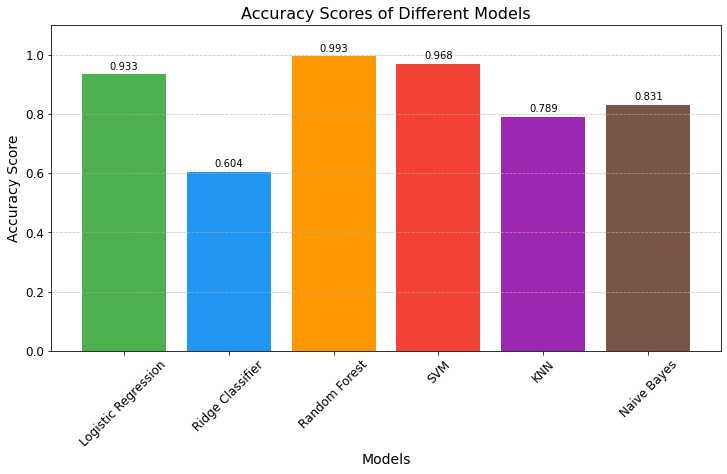

In [167]:
# Model names and accuracy scores
model_names = ['Logistic Regression', 'Ridge Classifier', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracy_scores = [0.9332346410066616,  0.6042931162102146, 0.9933382679496668, 0.9678756476683938,0.7891931902294597,0.8313841598815692]

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracy_scores, color=['#4CAF50', '#2196F3', '#FF9800', '#F44336', '#9C27B0', '#795548'])

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Accuracy Scores of Different Models', fontsize=16)
plt.ylim([0, 1.1])  
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



Random Forest Classifier

Accuracy: 99.31%
Performance: The Random Forest Classifier performed exceptionally well, efficiently handling complex data and reducing overfitting through ensemble methods.

Support Vector Machine (SVM)

Accuracy: 96.77%
Performance: The SVM model demonstrated strong performance, effectively handling high-dimensional data and non-linear decision boundaries.

Logistic Regression

Accuracy: 93.35%
Performance: Logistic Regression showed solid performance, making it a reliable model with high accuracy.

K-Nearest Neighbors (KNN)

Accuracy: 78.91%
Performance: The KNN model showed moderate performance. It demonstrated the importance of hyperparameter tuning for improved accuracy and better predictions.

Ridge Classifier

Accuracy: 60.43%
Performance: The Ridge Classifier had a lower accuracy score, indicating it may not be the best fit for this dataset without further tuning or alternative approaches.

Naive Bayes

Accuracy: 83.06%
Performance: The Naive Bayes classifier performed reasonably well, indicating it can handle this dataset, though further tuning could potentially improve its accuracy.

**FEATURE IMPORTANCE**

**The best performing model is Random Forest and here is the rank of feature importance.**

In [168]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the original feature names
original_feature_names = X_train.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': original_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                                              Feature  Importance
47                      how much paid in last month.1    0.465071
44                               occupation (grouped)    0.027859
31                              wealth index combined    0.024901
33                        educational attainment head    0.020578
37             husband/partner's occupation (grouped)    0.019944
40           husband/partner's educational attainment    0.018904
13                                main floor material    0.018002
36                                   age at first sex    0.017764
5                            source of drinking water    0.017709
3                                              region    0.017519
41                              husband/partner's age    0.017388
14                                 main wall material    0.017298
21                              age of household head    0.017109
6                             type of toilet facility  

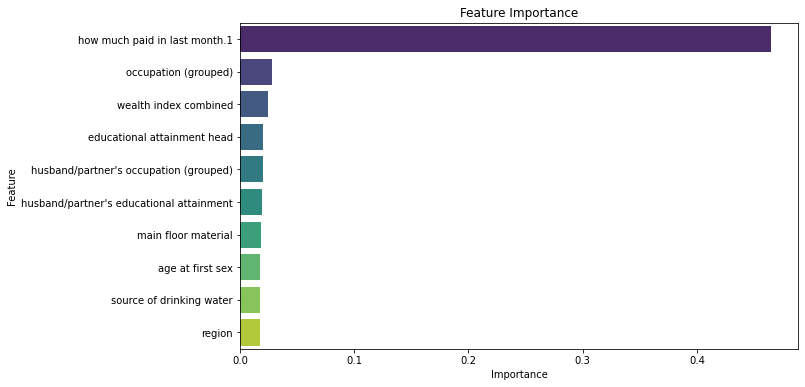

In [171]:
# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
